# **Feature Engineering**

## Objectives

* Engineer features for a Regression model

## Inputs

* outputs/datasets/cleaned/TrainSet.csv
* outputs/datasets/cleaned/TestSet.csv

## Outputs

* Generate a list with variables to engineer

## Conclusions

Following the feature engineering. The following recommendations are proposed.

- Focused variables
     - ['1stFlrSF','GarageArea','GrLivArea','TotalBsmtSF','TotalLivArea','YearBuilt','KitchenQual','OverallQual']
- Numerical Transformaton
     - Log-e = ['GrLivArea']
     - Yeo Johnson = ['1stFlrSF','TotalBsmtSF','YearBuilt','TotalLivArea']
- Outlier Transformation
     - Windorizer = ['1stFlrSF','TotalBsmtSF','TotalLivArea','OverallQual','GarageArea','GrLivArea']
- Smart Correlated Selection
     - Variables to be removed = ['1stFlrSF','GarageYrBlt','GrLivArea']


---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/milestone-project-5/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/milestone-project-5'

# Load Cleaned Data

Load Train Set

In [4]:
import pandas as pd
train_set_path = "outputs/datasets/cleaned/TrainSetCleaned.csv"
TrainSet = pd.read_csv(train_set_path)
TrainSet.head()

1stFlrSF  2ndFlrSF  BedroomAbvGr  BsmtExposure  BsmtFinSF1  BsmtFinType1  \
0      1828         0             3             3          48             1   
1       894         0             2             1           0             1   
2       964         0             2             1         713             5   
3      1689         0             3             1        1218             6   
4      1541         0             3             1           0             1   

   BsmtUnfSF  GarageArea  GarageFinish  GarageYrBlt  ...  LotArea  \
0       1774         774             1         2007  ...    11694   
1        894         308             1         1962  ...     6600   
2        163         432             1         1921  ...    13360   
3        350         857             2         2002  ...    13265   
4       1541         843             2         2001  ...    13704   

   LotFrontage  MasVnrArea  OpenPorchSF  OverallCond  OverallQual  \
0           90         452          108            5            9   
1           60           0            0            5            5   
2           80           0            0            7            5   
3           70         148           59            5            8   
4          118         150           81            5            7   

   TotalBsmtSF  YearBuilt  YearRemodAdd  SalePrice  
0         1822       2007          2007     314813  
1          894       1962          1962     109500  
2          876       1921          2006     163500  
3         1568       2002          2002     271000  
4         1541       2001          2002     205000  

[5 rows x 22 columns]

Load Test Set

In [5]:
import pandas as pd
test_set_path = "outputs/datasets/cleaned/TestSetCleaned.csv"
TestSet = pd.read_csv(test_set_path)
TestSet.head()

1stFlrSF  2ndFlrSF  BedroomAbvGr  BsmtExposure  BsmtFinSF1  BsmtFinType1  \
0      2515         0             4             1        1219             4   
1       958       620             3             1         403             3   
2       979       224             3             1         185             2   
3      1156       866             4             1         392             3   
4       525       567             3             1           0             1   

   BsmtUnfSF  GarageArea  GarageFinish  GarageYrBlt  ...  LotArea  \
0        816         484             1         1975  ...    32668   
1        238         240             1         1941  ...     9490   
2        524         352             1         1950  ...     7015   
3        768         505             3         1977  ...    10005   
4        525         264             1         1971  ...     1680   

   LotFrontage  MasVnrArea  OpenPorchSF  OverallCond  OverallQual  \
0           70           0            0            3            6   
1           79           0            0            7            6   
2           70         161            0            4            5   
3           83         299          117            5            7   
4           21         381            0            5            6   

   TotalBsmtSF  YearBuilt  YearRemodAdd  SalePrice  
0         2035       1957          1975     200624  
1          806       1941          1950     133000  
2          709       1950          1950     110000  
3         1160       1977          1977     192000  
4          525       1971          1971      88000  

[5 rows x 22 columns]

---

# Data Exploration

As explored in the SalePrice Study notebook, we added in an extra column for total living area (TotalLivArea), which included both the basement square foot and above gound square foot. 

We will add this to both train and test datasets and review the distribution.

### Total Floor Space
There are four variables that are related to floor space.
- 1stFlrSf is assumed to be included in GrLivArea.
- It is not clear if GarageArea is included in GrLivArea
- GrLivArea does not include below ground space, therefore assumption TotalBsmtSF is an additional feature to a property.


Therefore, we will combine GrLivArea and TotalBsmtSF to create a TotalLivArea and review if there is a stronger correlation to SalePrice
df_eda['TotalLivArea'] = df_eda['GrLivArea'] + df_eda['TotalBsmtSF']
df_eda.head(10)

In [6]:
TrainSet['TotalLivArea'] = TrainSet['GrLivArea'] + TrainSet['TotalBsmtSF']
TrainSet.head(5)

1stFlrSF  2ndFlrSF  BedroomAbvGr  BsmtExposure  BsmtFinSF1  BsmtFinType1  \
0      1828         0             3             3          48             1   
1       894         0             2             1           0             1   
2       964         0             2             1         713             5   
3      1689         0             3             1        1218             6   
4      1541         0             3             1           0             1   

   BsmtUnfSF  GarageArea  GarageFinish  GarageYrBlt  ...  LotFrontage  \
0       1774         774             1         2007  ...           90   
1        894         308             1         1962  ...           60   
2        163         432             1         1921  ...           80   
3        350         857             2         2002  ...           70   
4       1541         843             2         2001  ...          118   

   MasVnrArea  OpenPorchSF  OverallCond  OverallQual  TotalBsmtSF  YearBuilt  \
0         452          108            5            9         1822       2007   
1           0            0            5            5          894       1962   
2           0            0            7            5          876       1921   
3         148           59            5            8         1568       2002   
4         150           81            5            7         1541       2001   

   YearRemodAdd  SalePrice  TotalLivArea  
0          2007     314813          3650  
1          1962     109500          1788  
2          2006     163500          1840  
3          2002     271000          3257  
4          2002     205000          3082  

[5 rows x 23 columns]

In [7]:
TestSet['TotalLivArea'] = TestSet['GrLivArea'] + TestSet['TotalBsmtSF']
TestSet.head(5)

1stFlrSF  2ndFlrSF  BedroomAbvGr  BsmtExposure  BsmtFinSF1  BsmtFinType1  \
0      2515         0             4             1        1219             4   
1       958       620             3             1         403             3   
2       979       224             3             1         185             2   
3      1156       866             4             1         392             3   
4       525       567             3             1           0             1   

   BsmtUnfSF  GarageArea  GarageFinish  GarageYrBlt  ...  LotFrontage  \
0        816         484             1         1975  ...           70   
1        238         240             1         1941  ...           79   
2        524         352             1         1950  ...           70   
3        768         505             3         1977  ...           83   
4        525         264             1         1971  ...           21   

   MasVnrArea  OpenPorchSF  OverallCond  OverallQual  TotalBsmtSF  YearBuilt  \
0           0            0            3            6         2035       1957   
1           0            0            7            6          806       1941   
2         161            0            4            5          709       1950   
3         299          117            5            7         1160       1977   
4         381            0            5            6          525       1971   

   YearRemodAdd  SalePrice  TotalLivArea  
0          1975     200624          4550  
1          1950     133000          2384  
2          1950     110000          1912  
3          1977     192000          3182  
4          1971      88000          1617  

[5 rows x 23 columns]

In [8]:
from ydata_profiling import ProfileReport
pandas_report = ProfileReport(df=TrainSet, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

---

# Correlation and PPS Analysis

As we had cleaned the data in the last workbook, we will run the correlation and PPS analysis again on the trainset data to see any new feature correlations.

Custom function from Code Institute Walkthrough Project 02

In [9]:
corr_spearman_train = TrainSet.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(22)
corr_spearman_train

TotalLivArea    0.818804
OverallQual     0.802395
GrLivArea       0.732180
KitchenQual     0.667671
GarageArea      0.663543
YearBuilt       0.646465
GarageYrBlt     0.614886
TotalBsmtSF     0.596989
YearRemodAdd    0.574195
1stFlrSF        0.573961
GarageFinish    0.548100
OpenPorchSF     0.474517
LotArea         0.463452
MasVnrArea      0.437278
LotFrontage     0.394263
BsmtExposure    0.334323
BsmtFinType1    0.331907
BsmtFinSF1      0.312202
2ndFlrSF        0.301606
BedroomAbvGr    0.226873
BsmtUnfSF       0.166996
OverallCond    -0.105511
Name: SalePrice, dtype: float64

In [10]:
corr_spearman_test = TestSet.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(22)
corr_spearman_test

OverallQual     0.837577
TotalLivArea    0.802656
GrLivArea       0.727553
KitchenQual     0.696274
YearBuilt       0.680388
TotalBsmtSF     0.626619
GarageFinish    0.609208
GarageYrBlt     0.605667
GarageArea      0.592758
1stFlrSF        0.581252
YearRemodAdd    0.562918
OpenPorchSF     0.490399
LotArea         0.425823
BsmtExposure    0.382766
LotFrontage     0.345400
MasVnrArea      0.328538
BsmtFinType1    0.286417
BsmtUnfSF       0.262608
2ndFlrSF        0.257861
BsmtFinSF1      0.255621
OverallCond    -0.231723
BedroomAbvGr    0.207987
Name: SalePrice, dtype: float64

In [11]:
corr_pearson_train = TrainSet.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(22)
corr_pearson_train

TotalLivArea    0.813179
OverallQual     0.790636
GrLivArea       0.721707
KitchenQual     0.655542
GarageArea      0.646603
TotalBsmtSF     0.635535
1stFlrSF        0.620740
YearBuilt       0.521242
GarageYrBlt     0.518015
YearRemodAdd    0.517822
MasVnrArea      0.487600
GarageFinish    0.468889
BsmtFinSF1      0.401390
BsmtExposure    0.363360
LotFrontage     0.340919
OpenPorchSF     0.320193
2ndFlrSF        0.320141
BsmtFinType1    0.280064
LotArea         0.252766
BsmtUnfSF       0.206736
BedroomAbvGr    0.168830
OverallCond    -0.053643
Name: SalePrice, dtype: float64

In [12]:
corr_pearson_test = TestSet.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(22)
corr_pearson_test

OverallQual     0.792621
TotalLivArea    0.686212
KitchenQual     0.676426
GrLivArea       0.665093
1stFlrSF        0.559870
TotalBsmtSF     0.558510
GarageFinish    0.552985
GarageArea      0.544405
YearBuilt       0.531658
GarageYrBlt     0.471195
YearRemodAdd    0.467242
BsmtExposure    0.416345
MasVnrArea      0.415355
LotArea         0.375316
BsmtFinSF1      0.343180
LotFrontage     0.321675
2ndFlrSF        0.317586
OpenPorchSF     0.307344
BsmtUnfSF       0.242436
BsmtFinType1    0.230111
OverallCond    -0.171241
BedroomAbvGr    0.111214
Name: SalePrice, dtype: float64

In [13]:
top_n = 7
set(corr_pearson_train[:top_n].index.to_list() + corr_spearman_train[:top_n].index.to_list() + corr_pearson_test[:top_n].index.to_list() + corr_spearman_test[:top_n].index.to_list())

{'1stFlrSF',
 'GarageArea',
 'GarageFinish',
 'GarageYrBlt',
 'GrLivArea',
 'KitchenQual',
 'OverallQual',
 'TotalBsmtSF',
 'TotalLivArea',
 'YearBuilt'}

In [14]:
top_n = 6
set(corr_pearson_train[:top_n].index.to_list() + corr_spearman_train[:top_n].index.to_list() + corr_pearson_test[:top_n].index.to_list() + corr_spearman_test[:top_n].index.to_list())

{'1stFlrSF',
 'GarageArea',
 'GrLivArea',
 'KitchenQual',
 'OverallQual',
 'TotalBsmtSF',
 'TotalLivArea',
 'YearBuilt'}

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps


def heatmap_corr(df, threshold, figsize=(20, 12), font_annot=8):
    """ To display correlation heatmaps """
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True
        mask[abs(df) < threshold] = True

        fig, axes = plt.subplots(figsize=figsize)
        sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                    mask=mask, cmap='plasma',
                    annot_kws={"size": font_annot}, ax=axes,
                    linewidth=0.5
                    )
        axes.set_yticklabels(df.columns, rotation=0)
        plt.ylim(len(df.columns), 0)
        plt.show()


def heatmap_pps(df, threshold, figsize=(20, 12), font_annot=8):
    """ To display PPS heatmap """
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=np.bool)
        mask[abs(df) < threshold] = True
        fig, ax = plt.subplots(figsize=figsize)
        ax = sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                         mask=mask, cmap='rocket_r',
                         annot_kws={"size": font_annot},
                         linewidth=0.05, linecolor='grey')
        plt.ylim(len(df.columns), 0)
        plt.show()


def CalculateCorrAndPPS(df):
    """ To calculate Spearman and Pearson correlations and PPS score """
    df_corr_spearman = df.corr(method="spearman")
    df_corr_pearson = df.corr(method="pearson")

    pps_matrix_raw = pps.matrix(df)
    pps_matrix = pps_matrix_raw.filter(['x', 'y', 'ppscore']).pivot(
        columns='x', index='y', values='ppscore')

    pps_score_stats = pps_matrix_raw.query(
        "ppscore < 1").filter(['ppscore']).describe().T
    print(
        "PPS threshold - check PPS score IQR to decide threshold for heatmap\n"
         )
    print(pps_score_stats.round(3))

    return df_corr_pearson, df_corr_spearman, pps_matrix


def DisplayCorrAndPPS(df_corr_pearson, df_corr_spearman,
                      pps_matrix, CorrThreshold, PPS_Threshold,
                      figsize=(20, 12), font_annot=8):
    """ To display correlation and PPS heatmaps """
    print("\n")
    print("* Analyse how the target variable for your ML models are "
          "correlated with other variables (features and target)")
    print("* Analyse multi-colinearity, that is, how the features are "
          "correlated among themselves")

    print("\n")
    print("*** Heatmap: Spearman Correlation ***")
    print("It evaluates monotonic relationship \n")
    heatmap_corr(df=df_corr_spearman, threshold=CorrThreshold,
                 figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Pearson Correlation ***")
    print("It evaluates the linear relationship between two continuous "
          "variables \n")
    heatmap_corr(df=df_corr_pearson, threshold=CorrThreshold,
                 figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Power Predictive Score (PPS) ***")
    print(f"PPS detects linear or non-linear relationships between two "
          f"columns.\n"
          f"The score ranges from 0 (no predictive power) to 1 (perfect "
          f"predictive power) \n")
    heatmap_pps(df=pps_matrix, threshold=PPS_Threshold, figsize=figsize,
                font_annot=font_annot)

In [16]:
train_corr_pearson, train_corr_spearman, train_pps_matrix = CalculateCorrAndPPS(TrainSet)

PPS threshold - check PPS score IQR to decide threshold for heatmap

         count   mean    std  min  25%  50%    75%    max
ppscore  506.0  0.051  0.101  0.0  0.0  0.0  0.054  0.694


In [17]:
test_corr_pearson, test_corr_spearman, test_pps_matrix = CalculateCorrAndPPS(TestSet)

PPS threshold - check PPS score IQR to decide threshold for heatmap

         count   mean    std  min  25%  50%    75%    max
ppscore  506.0  0.043  0.101  0.0  0.0  0.0  0.026  0.747


We note from previous correlation anaylsis, good values (>0.6) were reported for a large number of variables, therefore we have amended the threshold below.



* Analyse how the target variable for your ML models are correlated with other variables (features and target)
* Analyse multi-colinearity, that is, how the features are correlated among themselves


*** Heatmap: Spearman Correlation ***
It evaluates monotonic relationship 



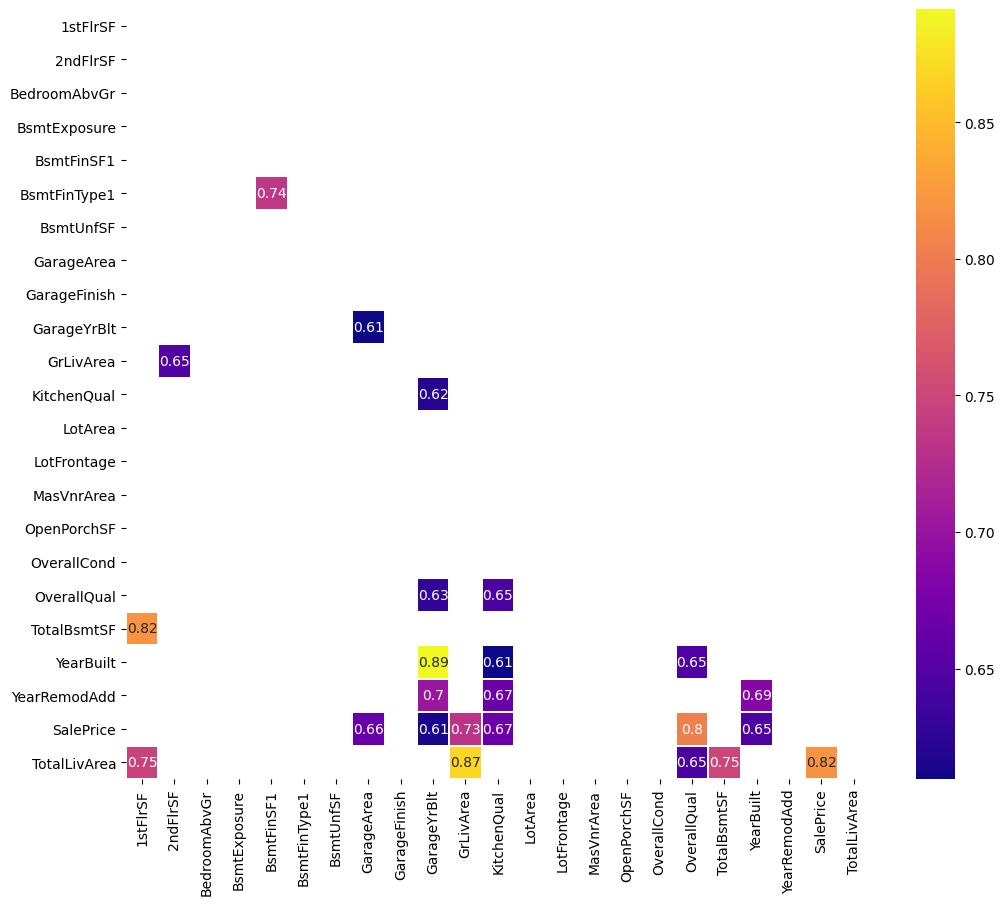



*** Heatmap: Pearson Correlation ***
It evaluates the linear relationship between two continuous variables 



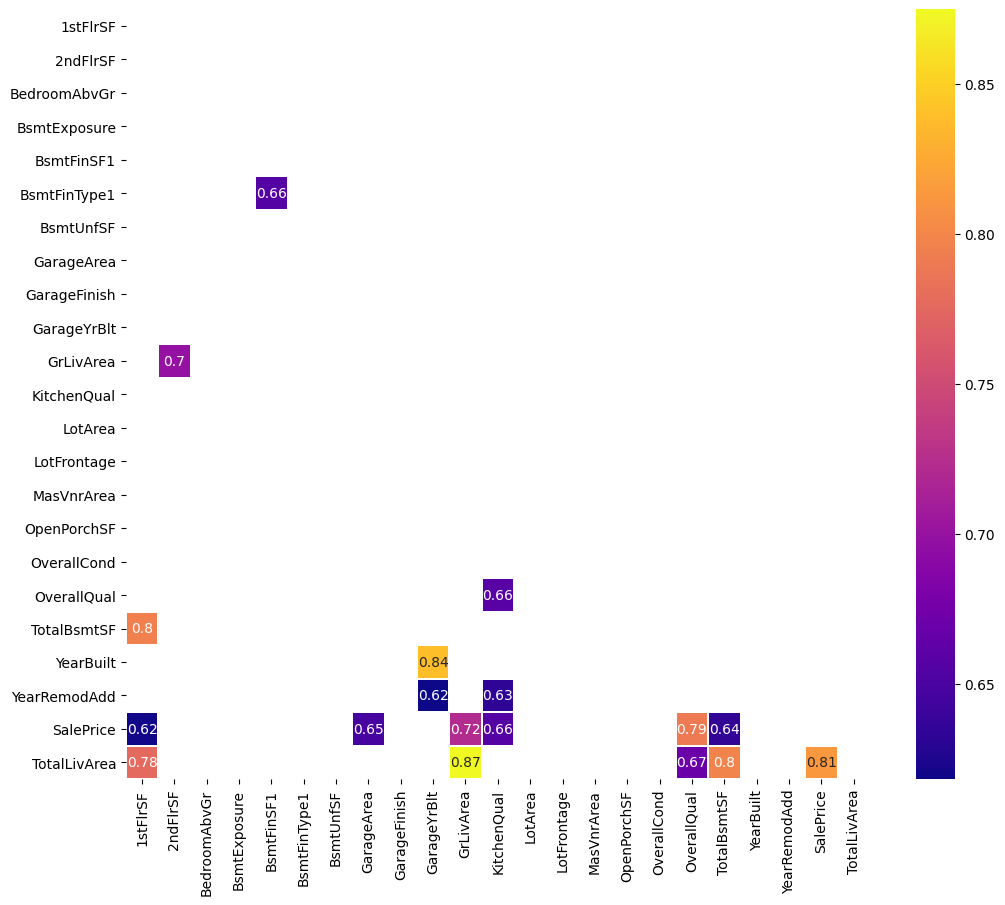



*** Heatmap: Power Predictive Score (PPS) ***
PPS detects linear or non-linear relationships between two columns.
The score ranges from 0 (no predictive power) to 1 (perfect predictive power) 



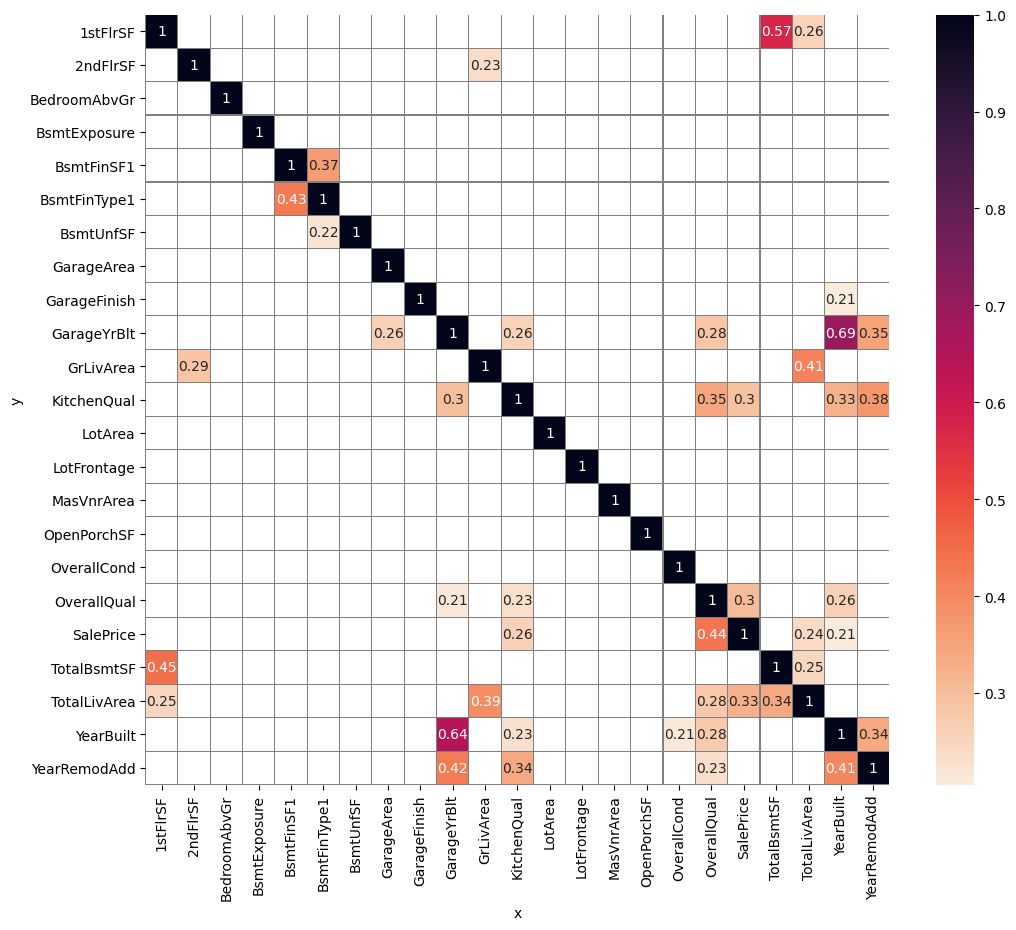

In [18]:
DisplayCorrAndPPS(df_corr_pearson=train_corr_pearson,
                  df_corr_spearman=train_corr_spearman,
                  pps_matrix=train_pps_matrix,
                  CorrThreshold=0.6, PPS_Threshold=0.2,
                  figsize=(12, 10), font_annot=10)

# Chosen variables

There is a stronger correlation with TotalLivArea compared to other floor space variables.
There are no stronger predictors to SalePrice that is different from previous anaylsis.

There are strong correlations between several variables and SalePrice. 
When reviewing the top correlated variables, when filtering from top 7 to top 8, we get an additional 2 variables
- GarageFinish - correlation is not > 0.6 for either pearson or spearman.
- GarageYrBlt - We know that this variable is strongly correlated to YearBuilt.

As a result the following variables will be further explored in this notebook:

- Numerical - ['1stFlrSF', 'GarageArea', 'GrLivArea', 'TotalBsmtSF', 'TotalLivArea', 'YearBuilt','KitchenQual', 'OverallQual']

# Feature Engineering

All variables are stored in an integer type. We 

In [19]:
numerical_variables = ['1stFlrSF', 'GarageArea', 'GrLivArea', 'TotalBsmtSF', 'TotalLivArea', 'YearBuilt','KitchenQual', 'OverallQual']

In [20]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
from feature_engine import transformation as vt
from feature_engine.outliers import Winsorizer
from feature_engine.encoding import OrdinalEncoder
sns.set(style="whitegrid")
warnings.filterwarnings('ignore')


def FeatureEngineeringAnalysis(df, analysis_type=None):
    """
    - used for quick feature engineering on numerical and categorical variables
    to decide which transformation can better transform the distribution shape
    - Once transformed, use a reporting tool, like ydata-profiling, to evaluate distributions
    """
    check_missing_values(df)
    allowed_types = ['numerical', 'ordinal_encoder', 'outlier_winsorizer']
    check_user_entry_on_analysis_type(analysis_type, allowed_types)
    list_column_transformers = define_list_column_transformers(analysis_type)

    # Loop in each variable and engineer the data according to the analysis type
    df_feat_eng = pd.DataFrame([])
    for column in df.columns:
        # create additional columns (column_method) to apply the methods
        df_feat_eng = pd.concat([df_feat_eng, df[column]], axis=1)
        for method in list_column_transformers:
            df_feat_eng[f"{column}_{method}"] = df[column]

        # Apply transformers in respective column_transformers
        df_feat_eng, list_applied_transformers = apply_transformers(
            analysis_type, df_feat_eng, column)

        # For each variable, assess how the transformations perform
        transformer_evaluation(
            column, list_applied_transformers, analysis_type, df_feat_eng)

    return df_feat_eng


def check_user_entry_on_analysis_type(analysis_type, allowed_types):
    """ Check analysis type """
    if analysis_type is None:
        raise SystemExit(
            f"You should pass analysis_type parameter as one of the following options: {allowed_types}")
    if analysis_type not in allowed_types:
        raise SystemExit(
            f"analysis_type argument should be one of these options: {allowed_types}")


def check_missing_values(df):
    if df.isna().sum().sum() != 0:
        raise SystemExit(
            f"There is a missing value in your dataset. Please handle that before getting into feature engineering.")


def define_list_column_transformers(analysis_type):
    """ Set suffix columns according to analysis_type"""
    if analysis_type == 'numerical':
        list_column_transformers = [
            "log_e", "log_10", "reciprocal", "power", "box_cox", "yeo_johnson"]

    elif analysis_type == 'ordinal_encoder':
        list_column_transformers = ["ordinal_encoder"]

    elif analysis_type == 'outlier_winsorizer':
        list_column_transformers = ['iqr']

    return list_column_transformers


def apply_transformers(analysis_type, df_feat_eng, column):
    for col in df_feat_eng.select_dtypes(include='category').columns:
        df_feat_eng[col] = df_feat_eng[col].astype('object')

    if analysis_type == 'numerical':
        df_feat_eng, list_applied_transformers = FeatEngineering_Numerical(
            df_feat_eng, column)

    elif analysis_type == 'outlier_winsorizer':
        df_feat_eng, list_applied_transformers = FeatEngineering_OutlierWinsorizer(
            df_feat_eng, column)

    elif analysis_type == 'ordinal_encoder':
        df_feat_eng, list_applied_transformers = FeatEngineering_CategoricalEncoder(
            df_feat_eng, column)

    return df_feat_eng, list_applied_transformers


def transformer_evaluation(column, list_applied_transformers, analysis_type, df_feat_eng):
    # For each variable, assess how the transformations perform
    print(f"* Variable Analyzed: {column}")
    print(f"* Applied transformation: {list_applied_transformers} \n")
    for col in [column] + list_applied_transformers:

        if analysis_type != 'ordinal_encoder':
            DiagnosticPlots_Numerical(df_feat_eng, col)

        else:
            if col == column:
                DiagnosticPlots_Categories(df_feat_eng, col)
            else:
                DiagnosticPlots_Numerical(df_feat_eng, col)

        print("\n")


def DiagnosticPlots_Categories(df_feat_eng, col):
    plt.figure(figsize=(4, 3))
    sns.countplot(data=df_feat_eng, x=col, palette=[
                  '#432371'], order=df_feat_eng[col].value_counts().index)
    plt.xticks(rotation=90)
    plt.suptitle(f"{col}", fontsize=30, y=1.05)
    plt.show()
    print("\n")


def DiagnosticPlots_Numerical(df, variable):
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    sns.histplot(data=df, x=variable, kde=True, element="step", ax=axes[0])
    stats.probplot(df[variable], dist="norm", plot=axes[1])
    sns.boxplot(x=df[variable], ax=axes[2])

    axes[0].set_title('Histogram')
    axes[1].set_title('QQ Plot')
    axes[2].set_title('Boxplot')
    fig.suptitle(f"{variable}", fontsize=30, y=1.05)
    plt.tight_layout()
    plt.show()


def FeatEngineering_CategoricalEncoder(df_feat_eng, column):
    list_methods_worked = []
    try:
        encoder = OrdinalEncoder(encoding_method='arbitrary', variables=[
                                 f"{column}_ordinal_encoder"])
        df_feat_eng = encoder.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_ordinal_encoder")

    except Exception:
        df_feat_eng.drop([f"{column}_ordinal_encoder"], axis=1, inplace=True)

    return df_feat_eng, list_methods_worked


def FeatEngineering_OutlierWinsorizer(df_feat_eng, column):
    list_methods_worked = []

    # Winsorizer iqr
    try:
        disc = Winsorizer(
            capping_method='iqr', tail='both', fold=1.5, variables=[f"{column}_iqr"])
        df_feat_eng = disc.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_iqr")
    except Exception:
        df_feat_eng.drop([f"{column}_iqr"], axis=1, inplace=True)

    return df_feat_eng, list_methods_worked


def FeatEngineering_Numerical(df_feat_eng, column):
    list_methods_worked = []

    # LogTransformer base e
    try:
        lt = vt.LogTransformer(variables=[f"{column}_log_e"])
        df_feat_eng = lt.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_log_e")
    except Exception:
        df_feat_eng.drop([f"{column}_log_e"], axis=1, inplace=True)

    # LogTransformer base 10
    try:
        lt = vt.LogTransformer(variables=[f"{column}_log_10"], base='10')
        df_feat_eng = lt.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_log_10")
    except Exception:
        df_feat_eng.drop([f"{column}_log_10"], axis=1, inplace=True)

    # ReciprocalTransformer
    try:
        rt = vt.ReciprocalTransformer(variables=[f"{column}_reciprocal"])
        df_feat_eng = rt.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_reciprocal")
    except Exception:
        df_feat_eng.drop([f"{column}_reciprocal"], axis=1, inplace=True)

    # PowerTransformer
    try:
        pt = vt.PowerTransformer(variables=[f"{column}_power"])
        df_feat_eng = pt.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_power")
    except Exception:
        df_feat_eng.drop([f"{column}_power"], axis=1, inplace=True)

    # BoxCoxTransformer
    try:
        bct = vt.BoxCoxTransformer(variables=[f"{column}_box_cox"])
        df_feat_eng = bct.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_box_cox")
    except Exception:
        df_feat_eng.drop([f"{column}_box_cox"], axis=1, inplace=True)

    # YeoJohnsonTransformer
    try:
        yjt = vt.YeoJohnsonTransformer(variables=[f"{column}_yeo_johnson"])
        df_feat_eng = yjt.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_yeo_johnson")
    except Exception:
        df_feat_eng.drop([f"{column}_yeo_johnson"], axis=1, inplace=True)

    return df_feat_eng, list_methods_worked

## Numerical Encoding

In [21]:
df_engineering = TrainSet[numerical_variables].copy()
df_engineering.head(3)

1stFlrSF  GarageArea  GrLivArea  TotalBsmtSF  TotalLivArea  YearBuilt  \
0      1828         774       1828         1822          3650       2007   
1       894         308        894          894          1788       1962   
2       964         432        964          876          1840       1921   

   KitchenQual  OverallQual  
0            4            9  
1            3            5  
2            3            5

* Variable Analyzed: 1stFlrSF
* Applied transformation: ['1stFlrSF_log_e', '1stFlrSF_log_10', '1stFlrSF_reciprocal', '1stFlrSF_power', '1stFlrSF_box_cox', '1stFlrSF_yeo_johnson'] 



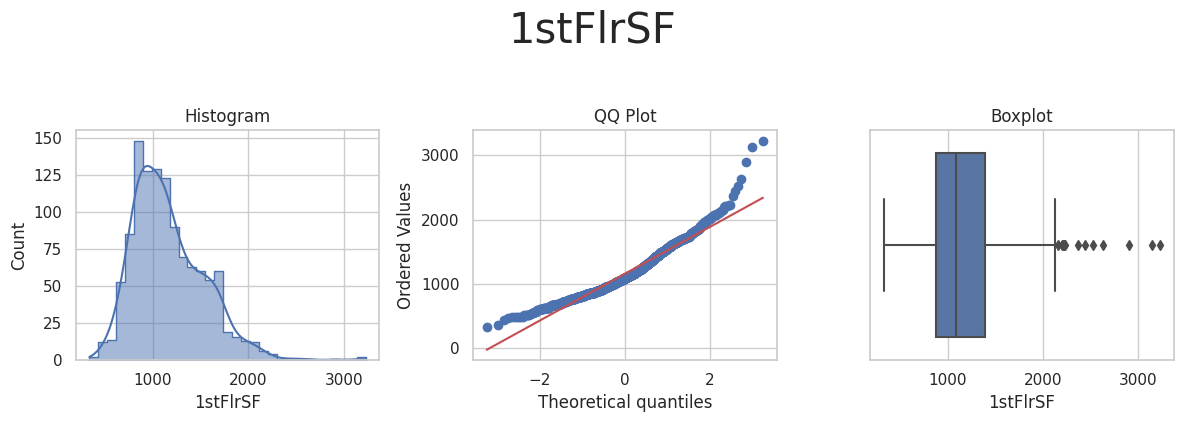

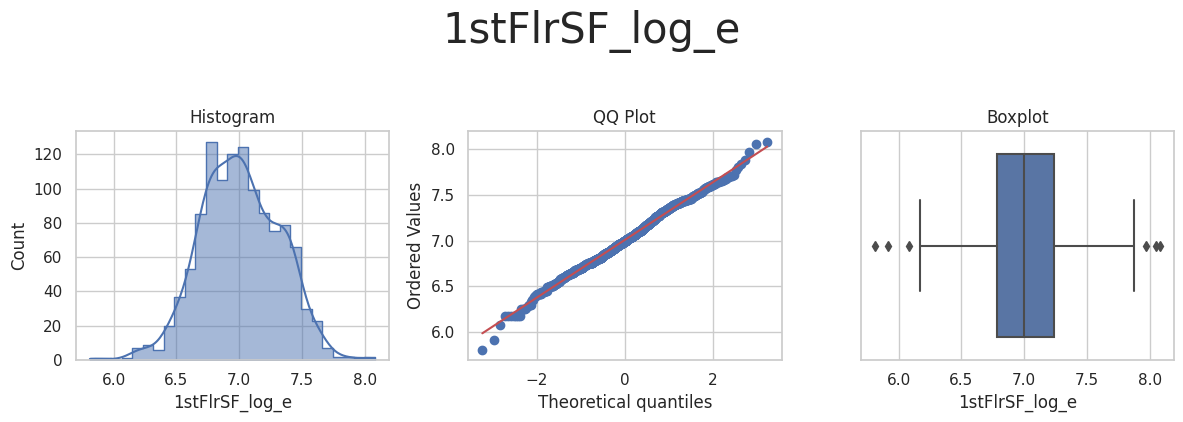

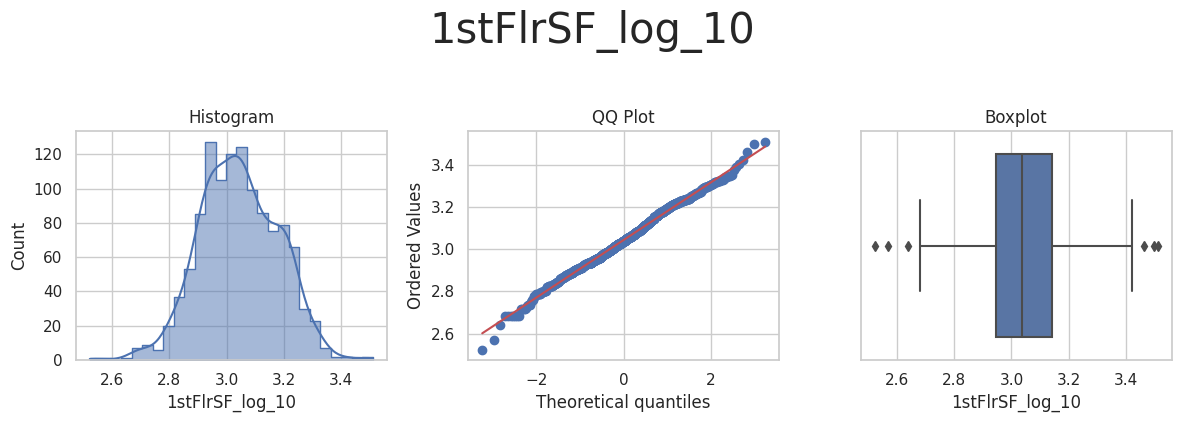

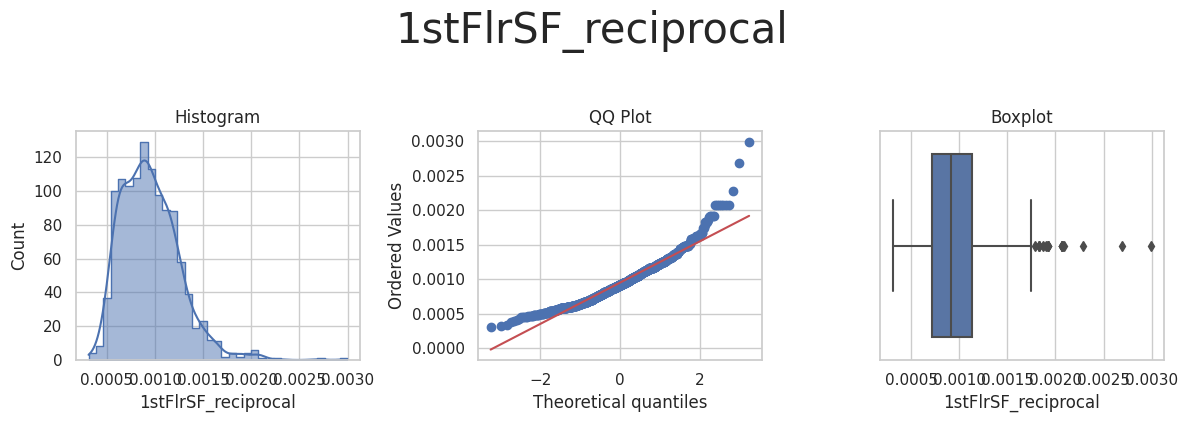

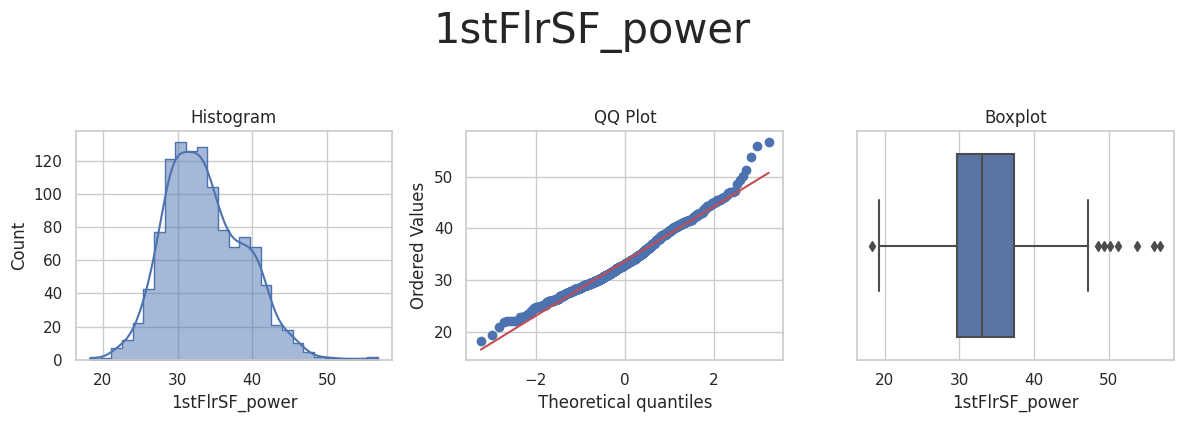

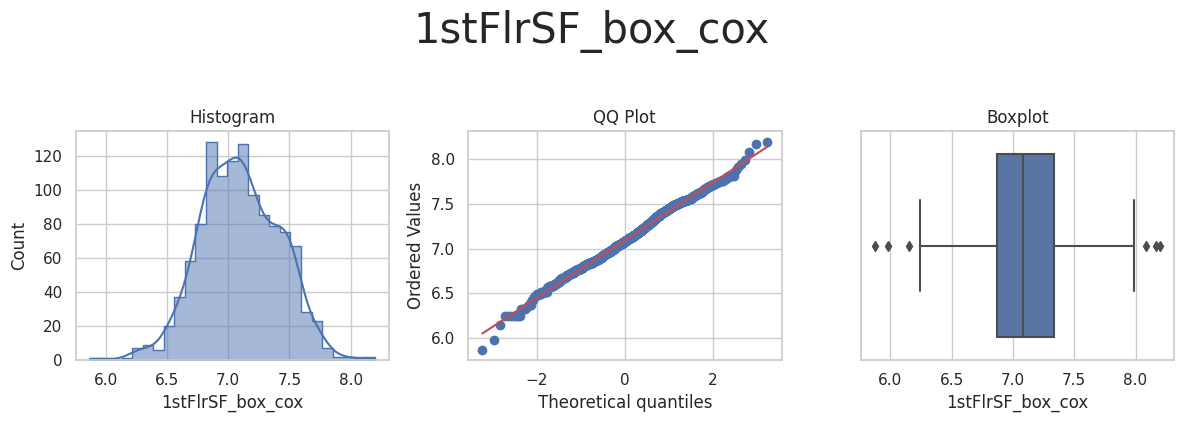

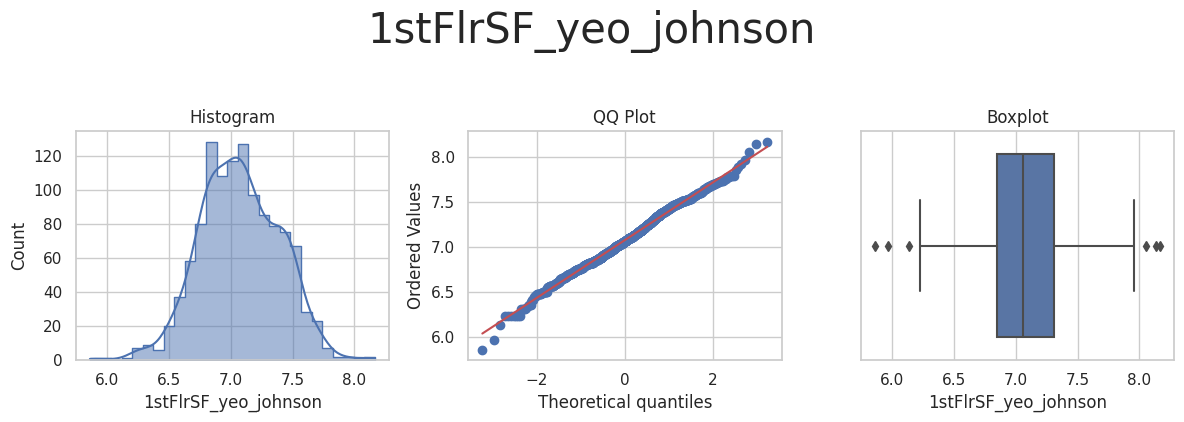



* Variable Analyzed: GarageArea
* Applied transformation: ['GarageArea_power', 'GarageArea_yeo_johnson'] 



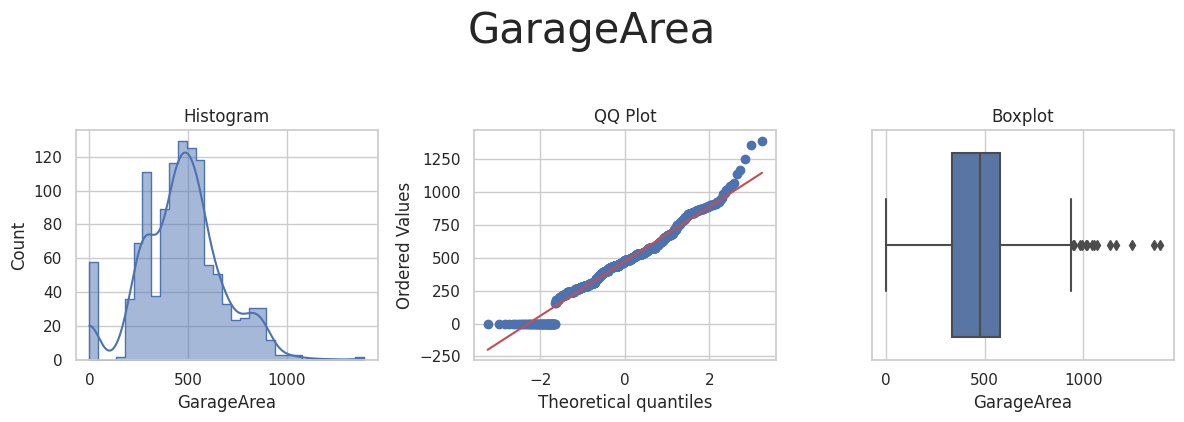

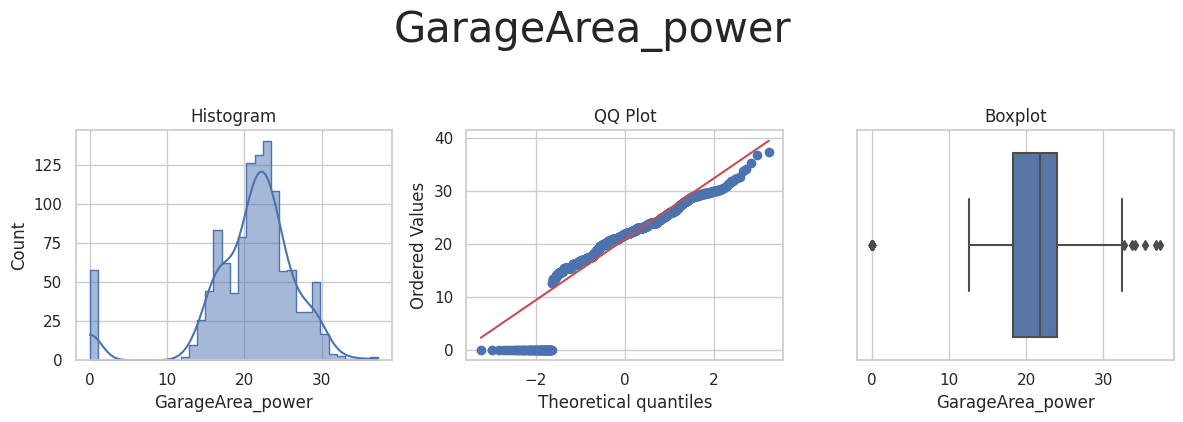

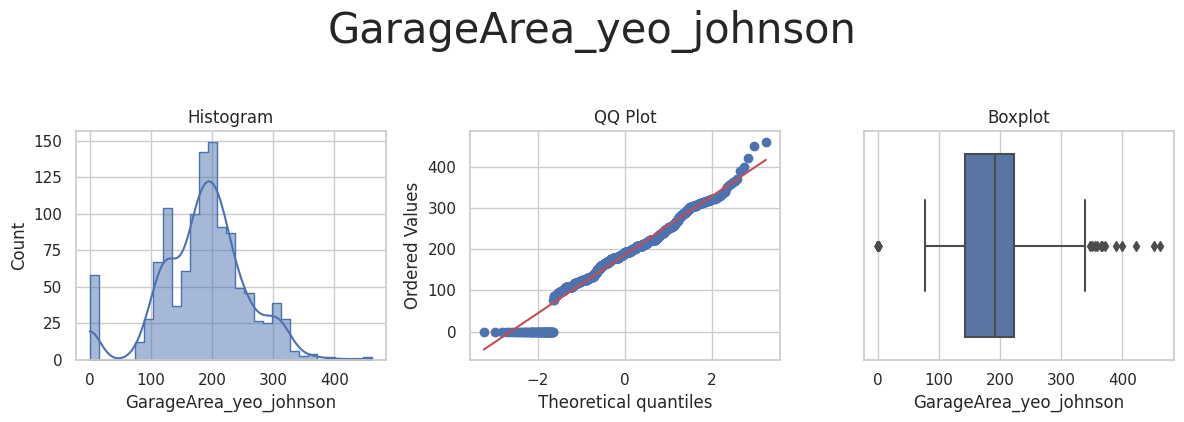



* Variable Analyzed: GrLivArea
* Applied transformation: ['GrLivArea_log_e', 'GrLivArea_log_10', 'GrLivArea_reciprocal', 'GrLivArea_power', 'GrLivArea_box_cox', 'GrLivArea_yeo_johnson'] 



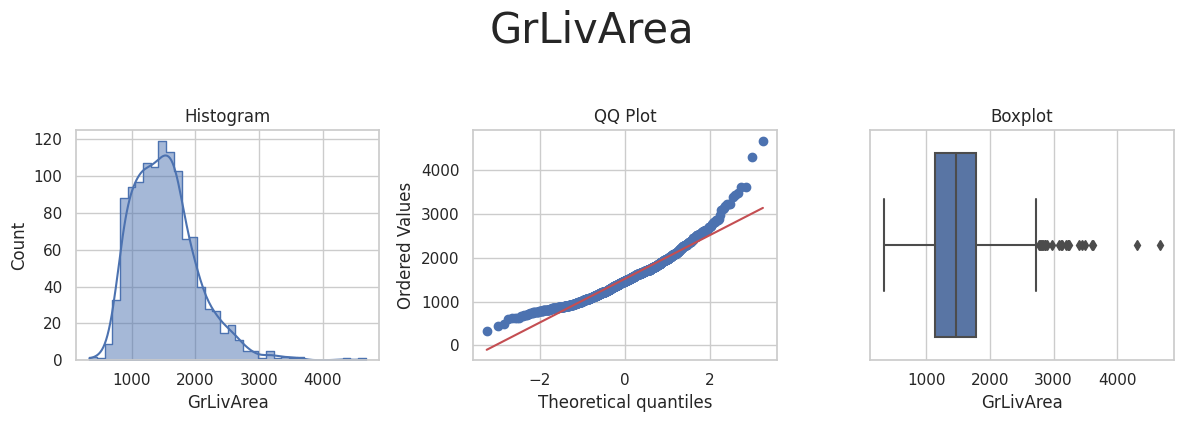

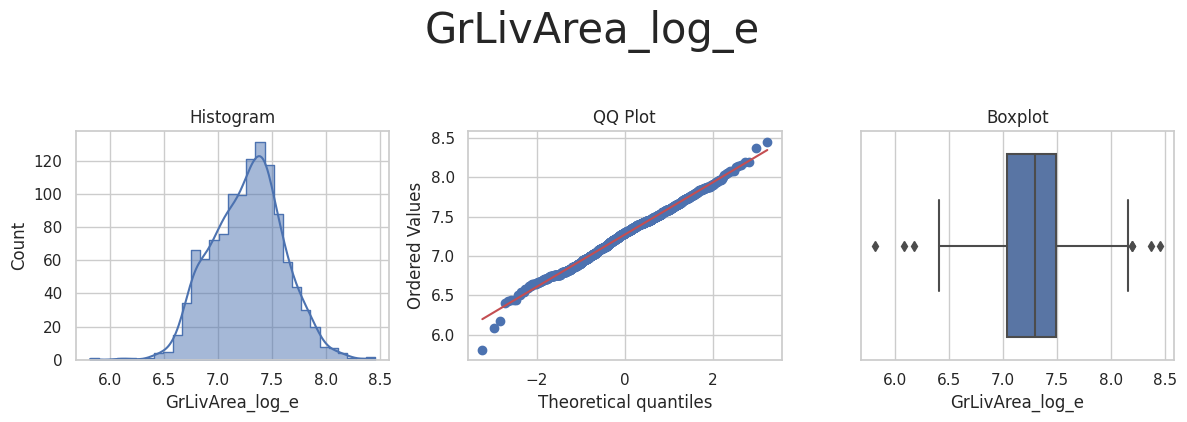

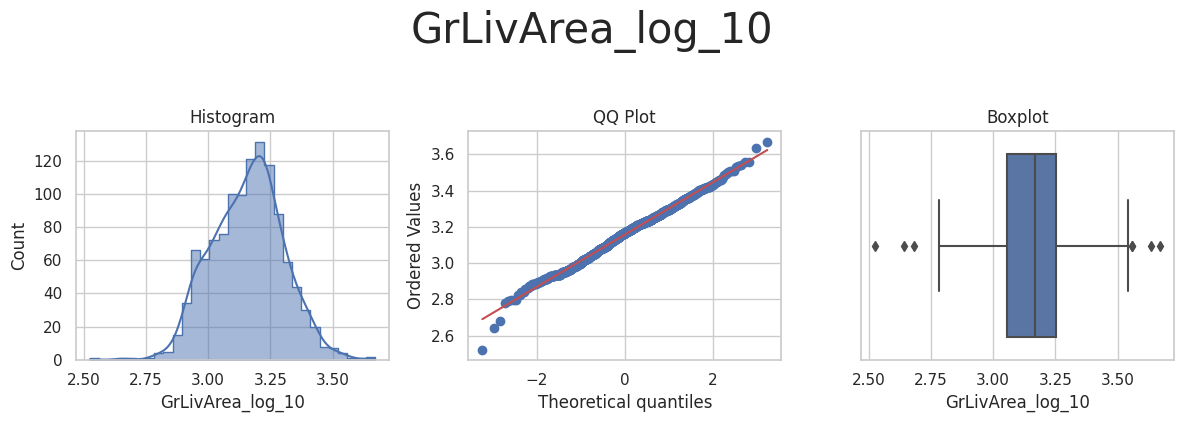

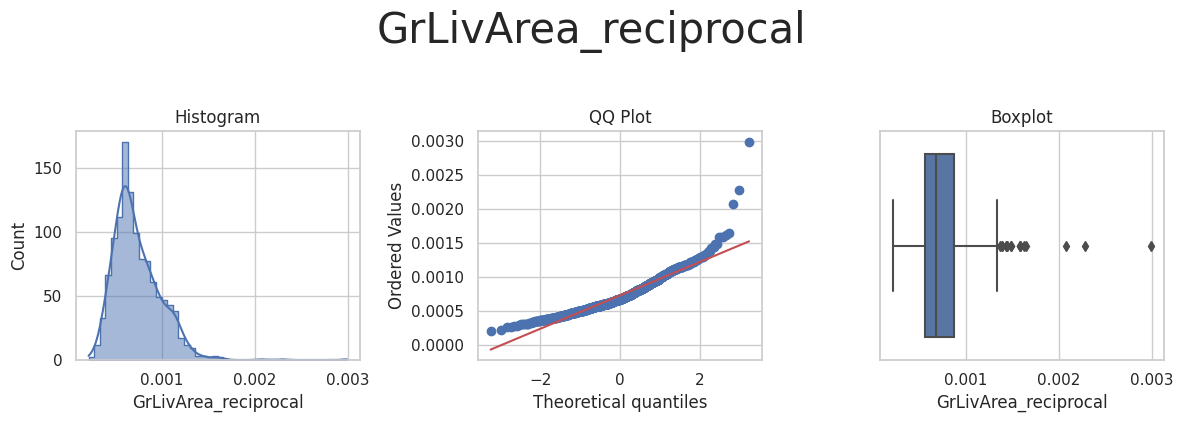

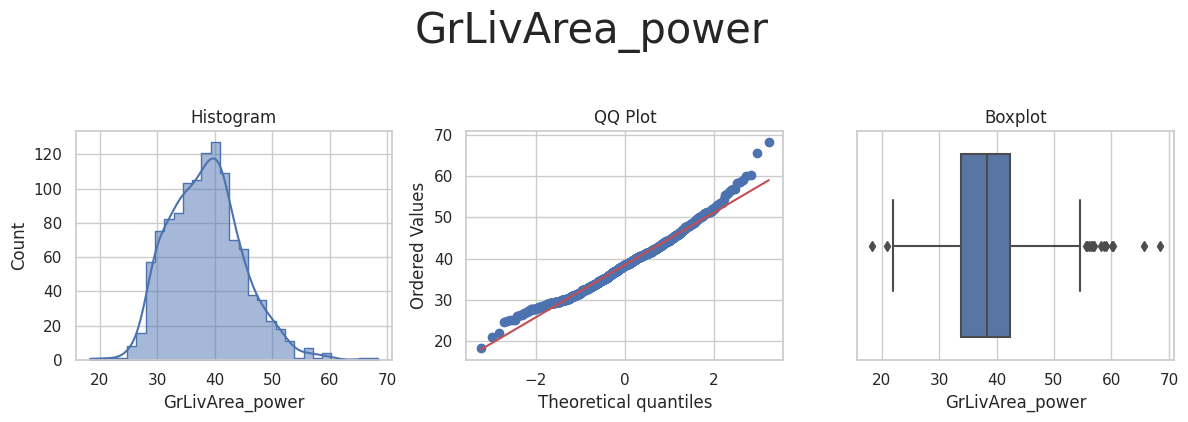

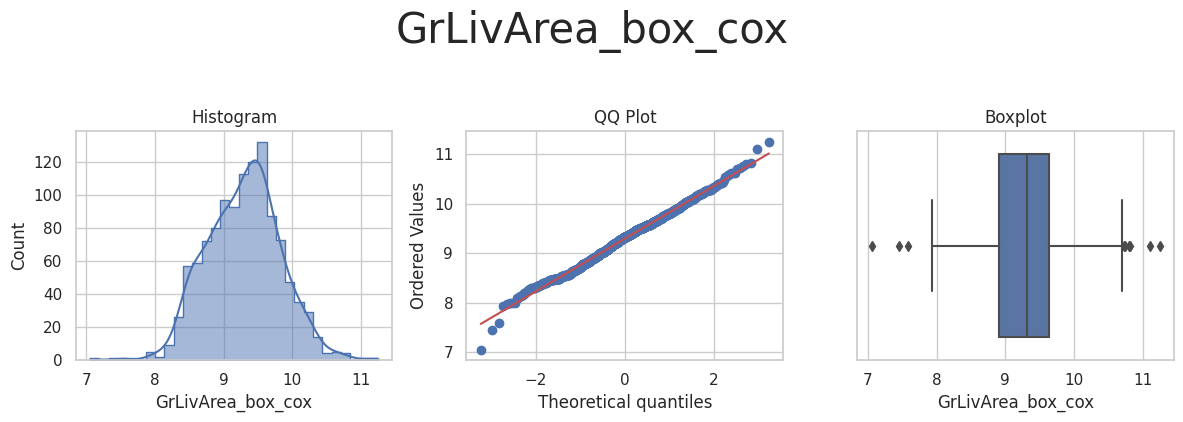

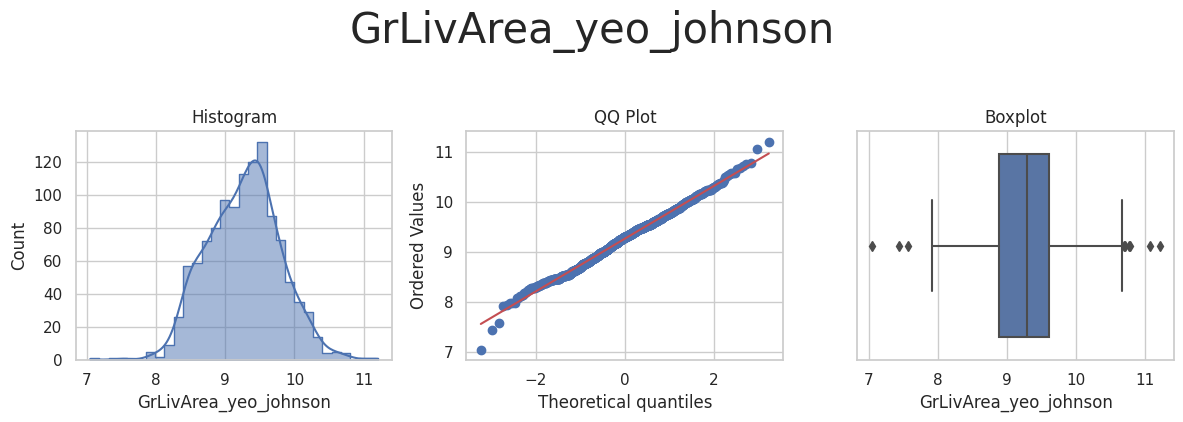



* Variable Analyzed: TotalBsmtSF
* Applied transformation: ['TotalBsmtSF_power', 'TotalBsmtSF_yeo_johnson'] 



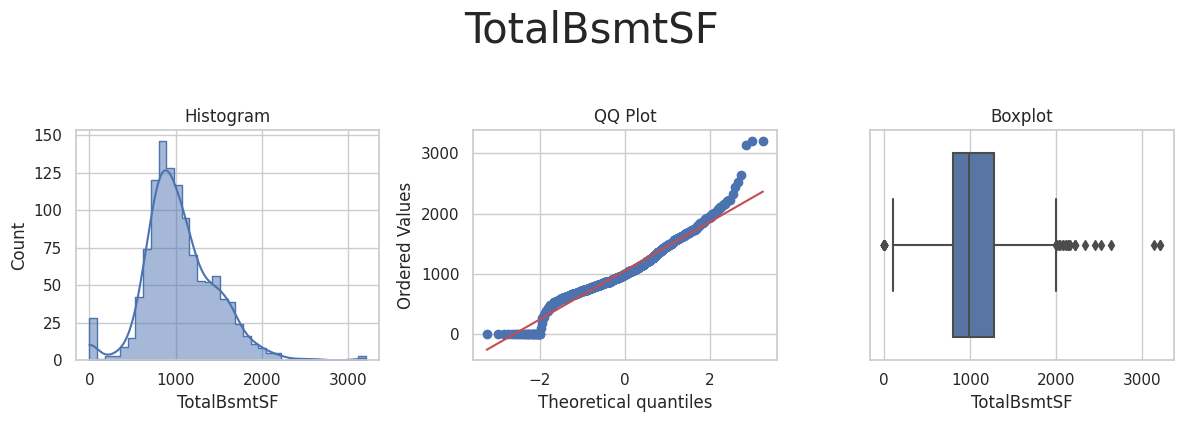

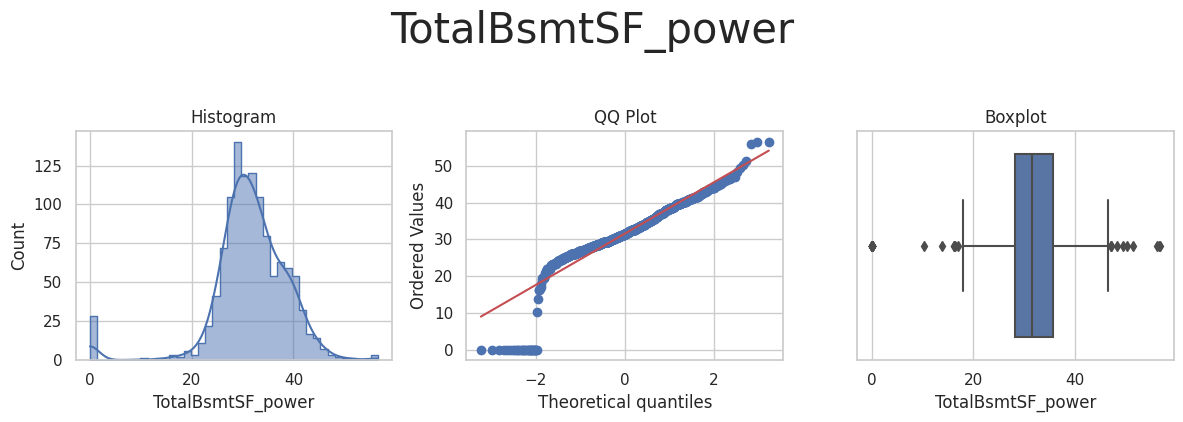

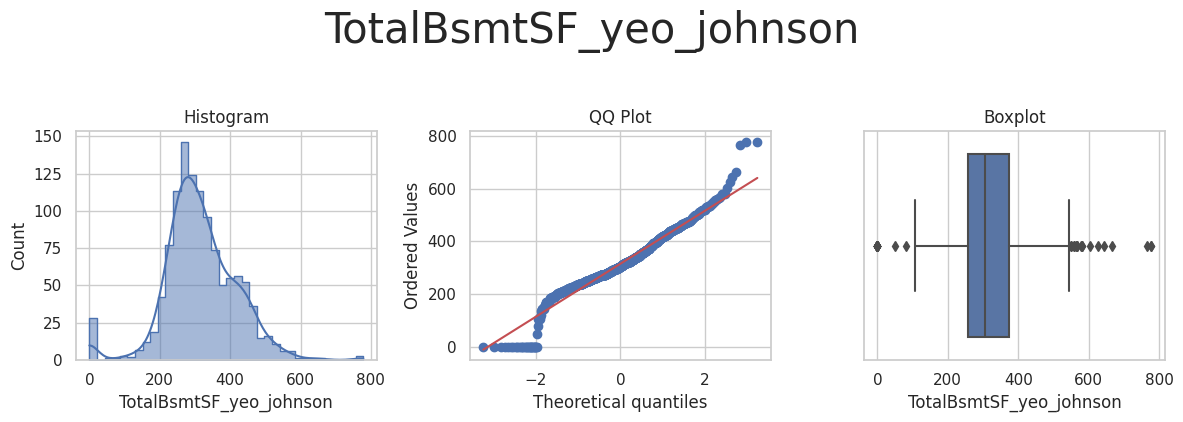



* Variable Analyzed: TotalLivArea
* Applied transformation: ['TotalLivArea_log_e', 'TotalLivArea_log_10', 'TotalLivArea_reciprocal', 'TotalLivArea_power', 'TotalLivArea_box_cox', 'TotalLivArea_yeo_johnson'] 



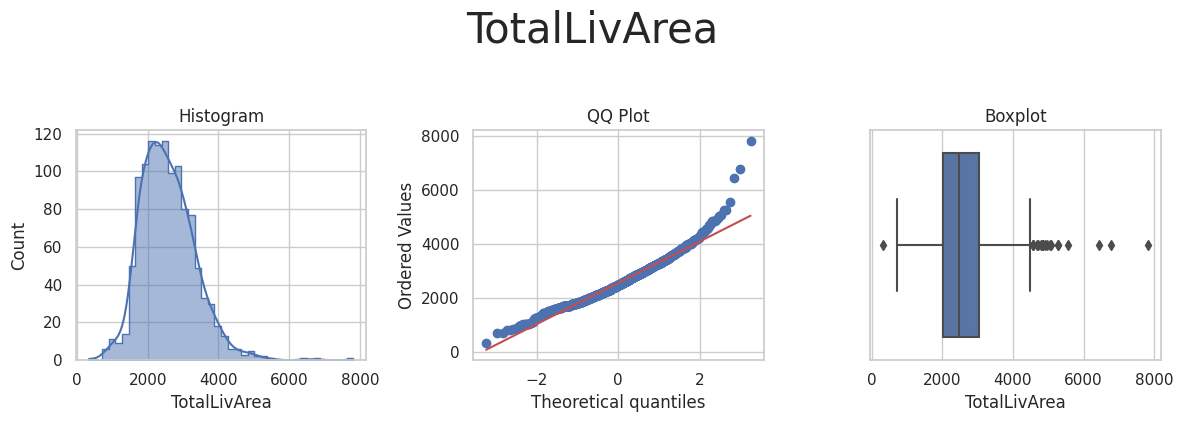

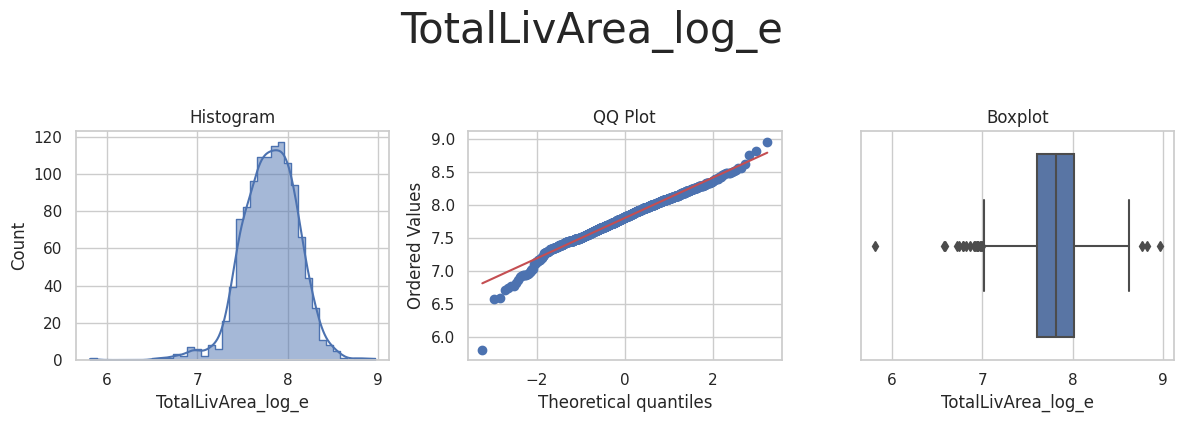

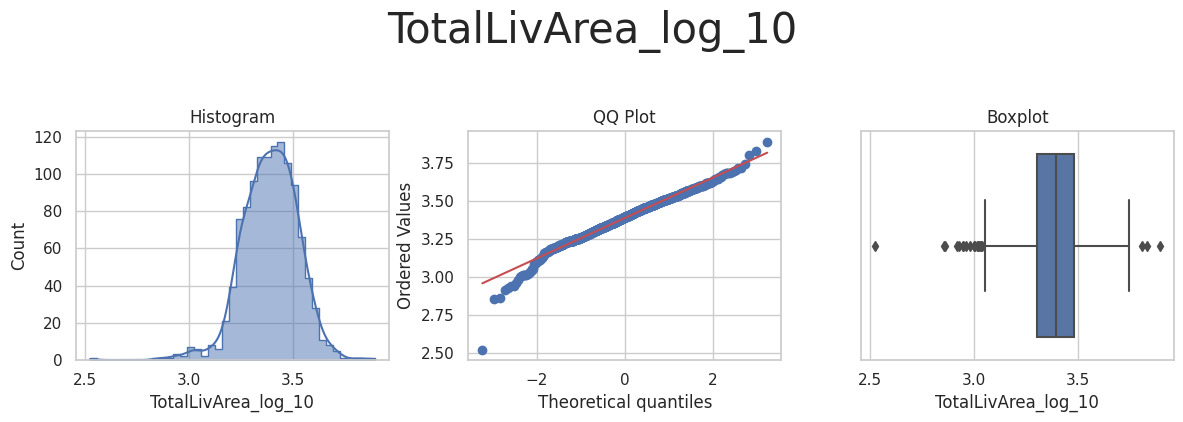

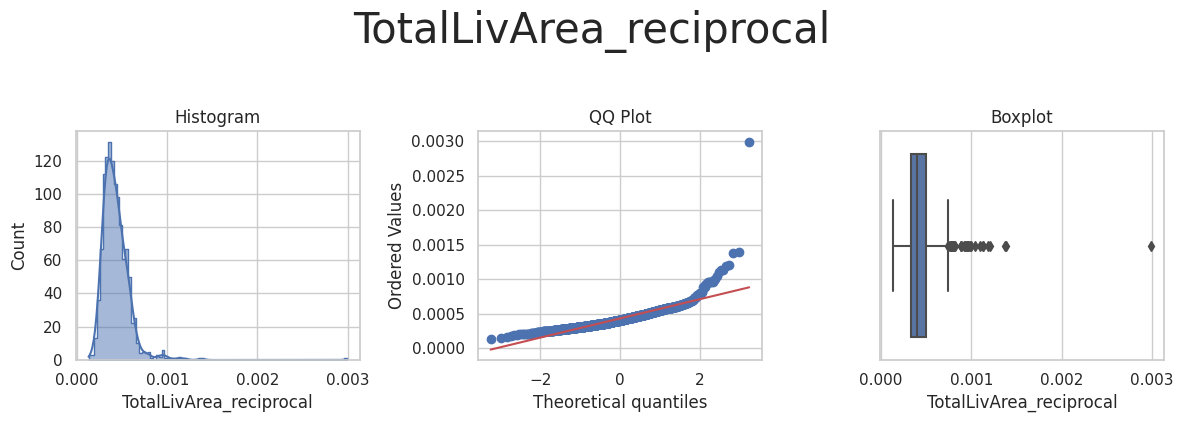

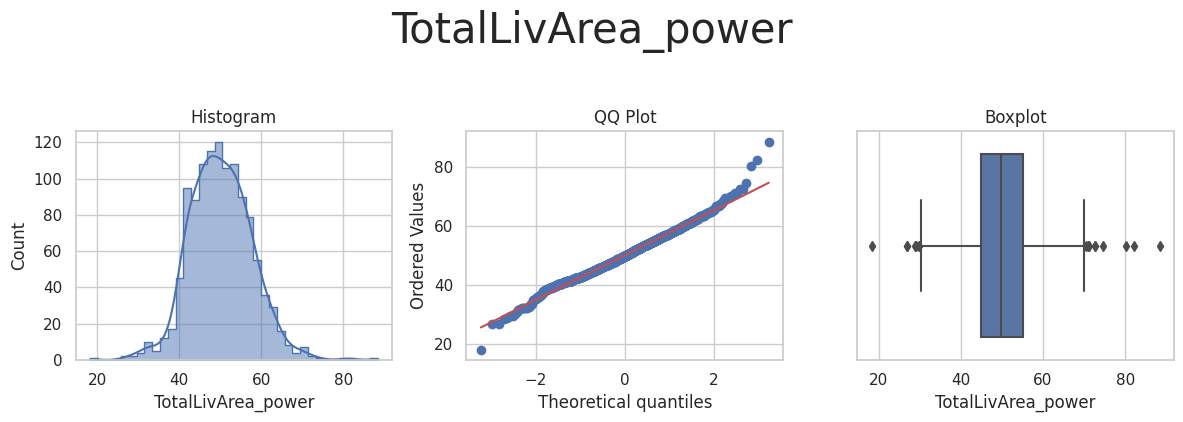

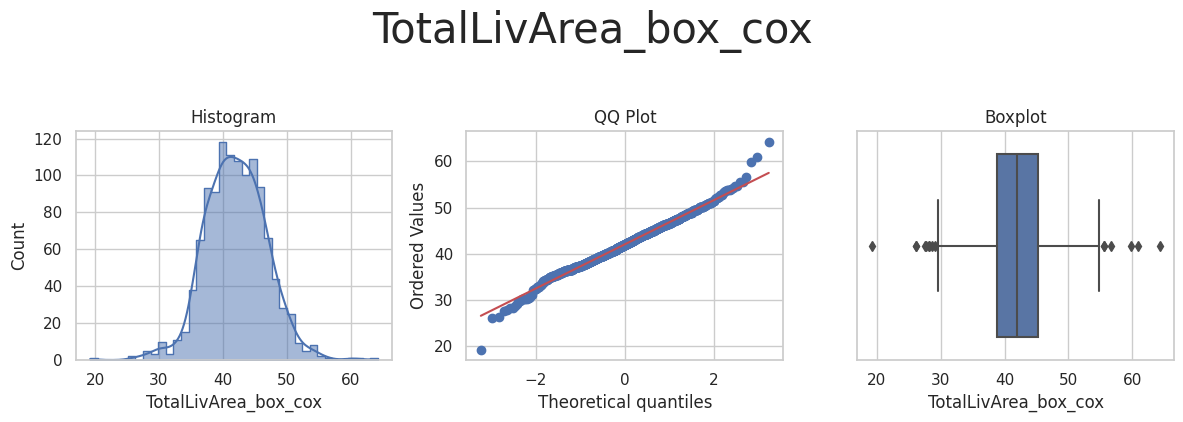

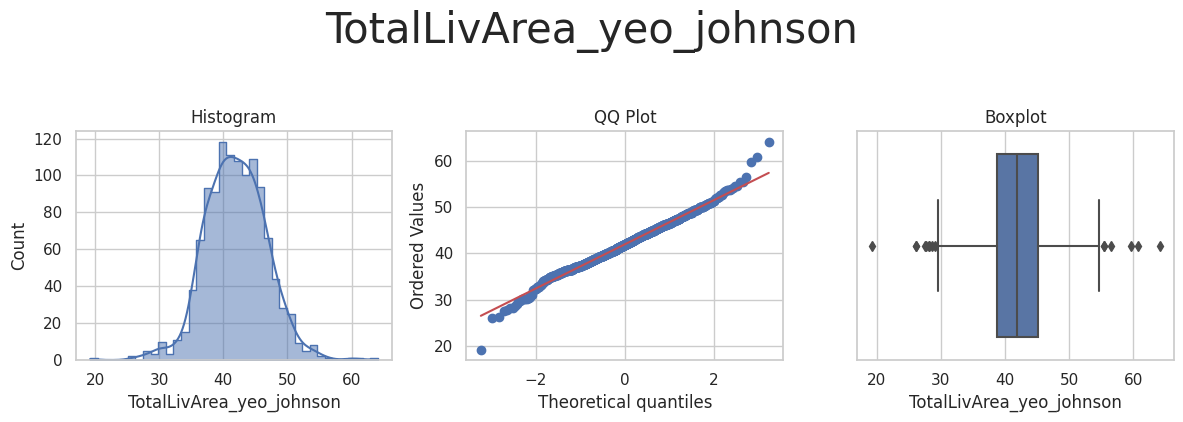



* Variable Analyzed: YearBuilt
* Applied transformation: ['YearBuilt_log_e', 'YearBuilt_log_10', 'YearBuilt_reciprocal', 'YearBuilt_power', 'YearBuilt_box_cox', 'YearBuilt_yeo_johnson'] 



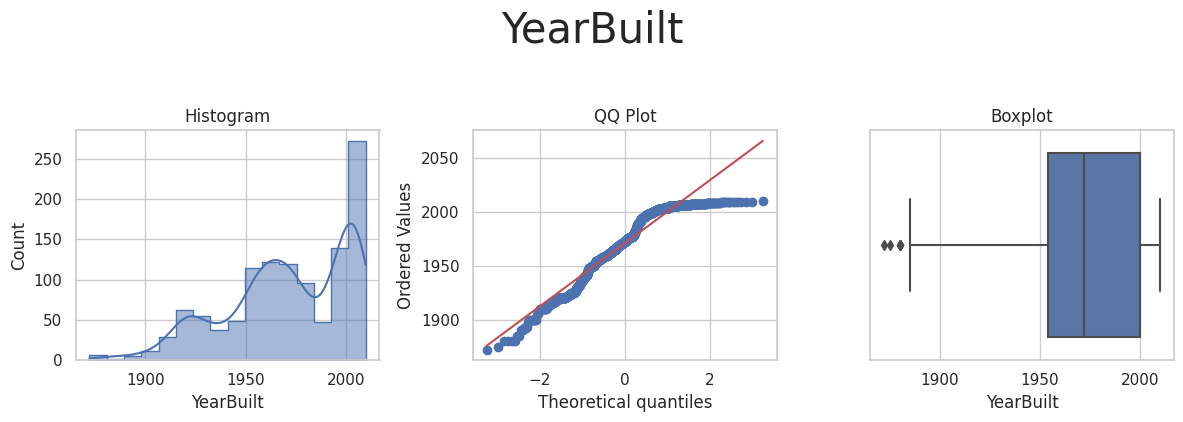

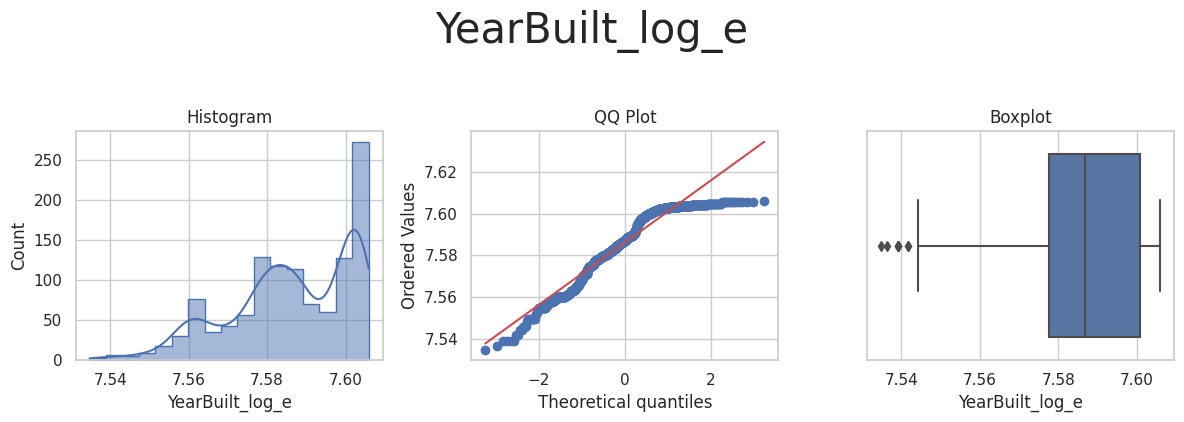

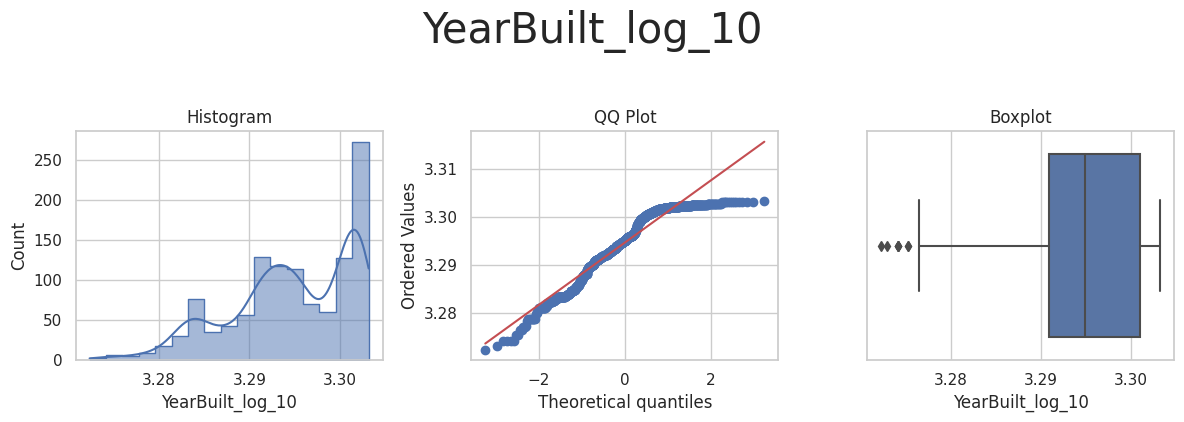

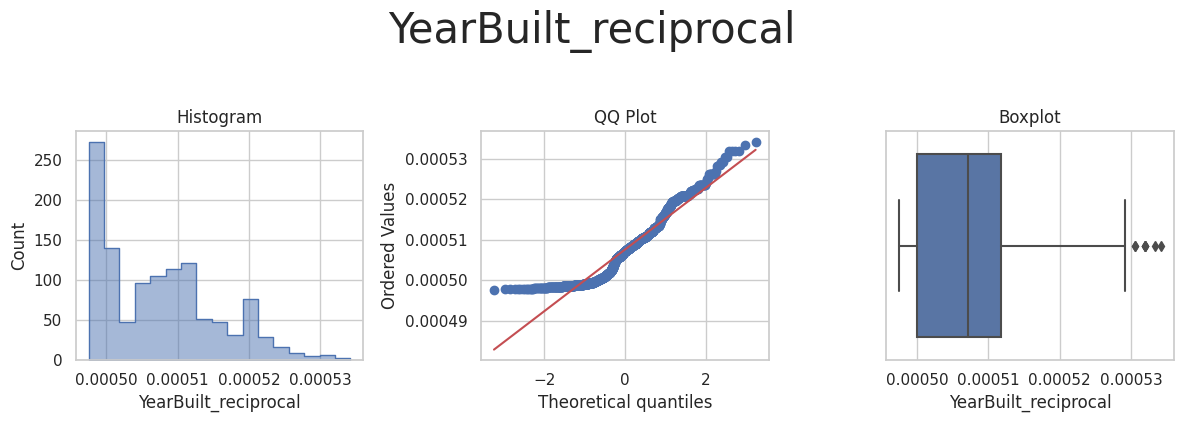

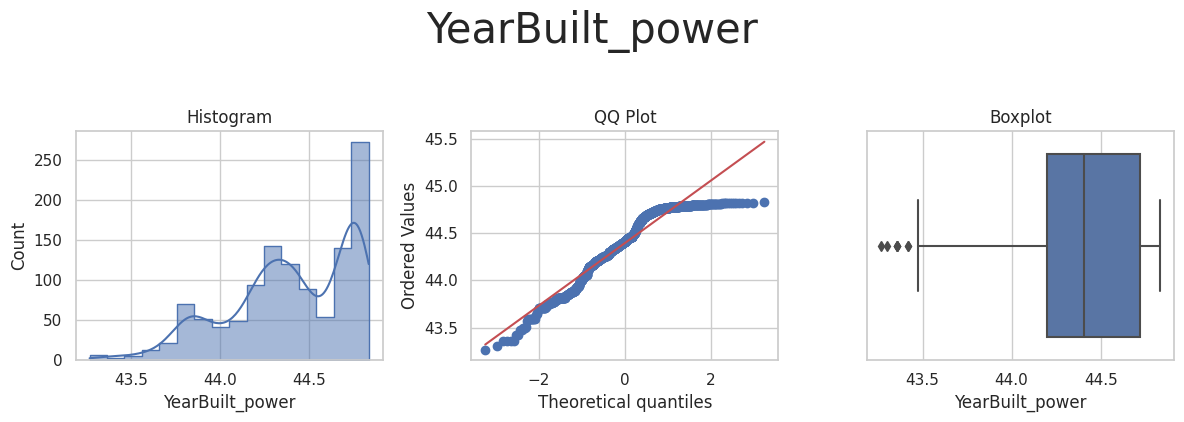

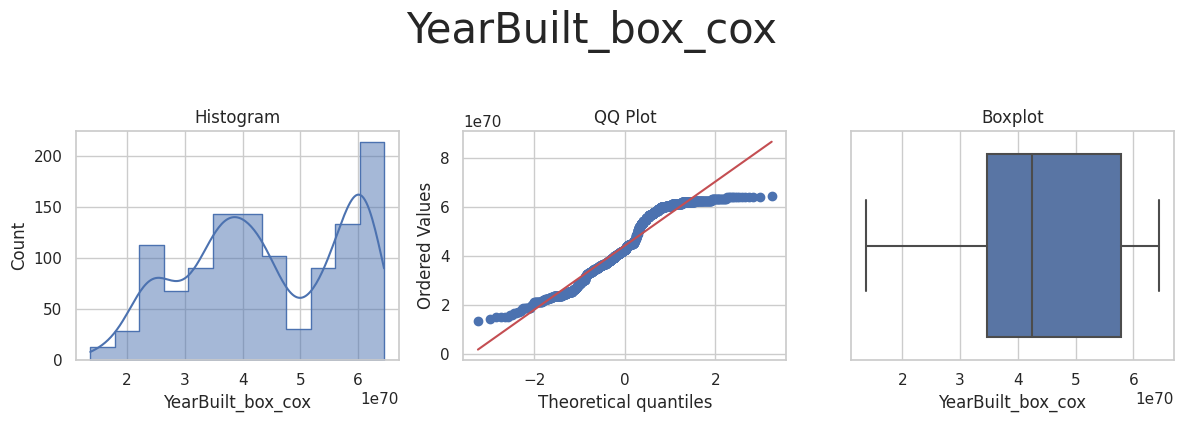

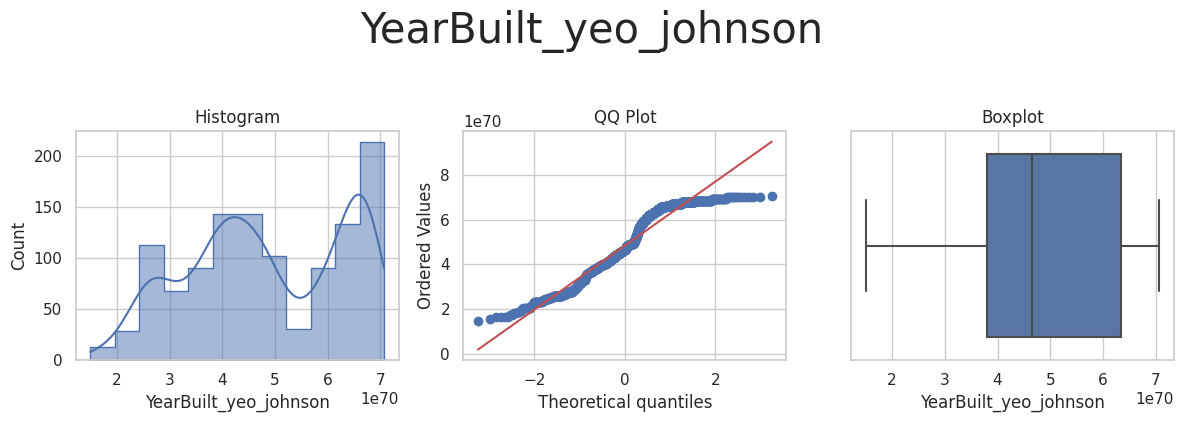



* Variable Analyzed: KitchenQual
* Applied transformation: ['KitchenQual_log_e', 'KitchenQual_log_10', 'KitchenQual_reciprocal', 'KitchenQual_power', 'KitchenQual_box_cox', 'KitchenQual_yeo_johnson'] 



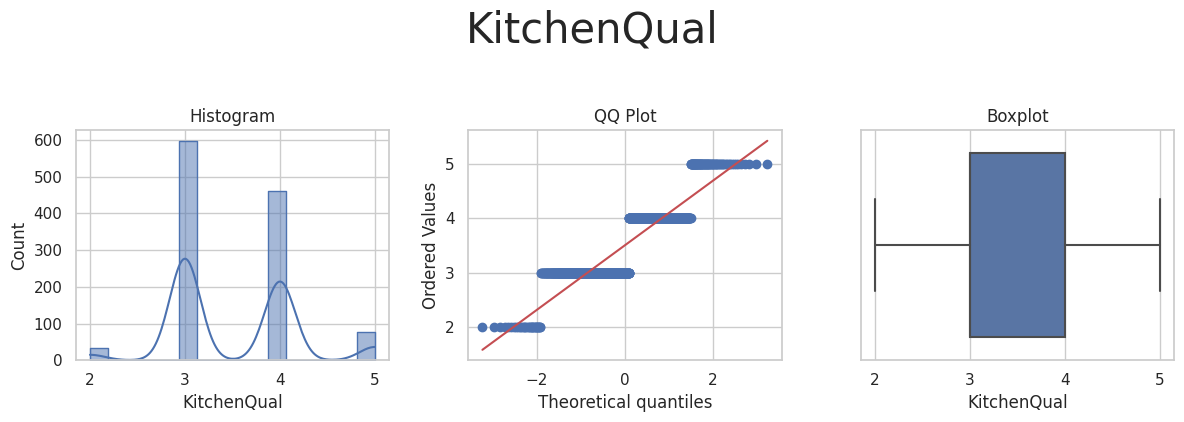

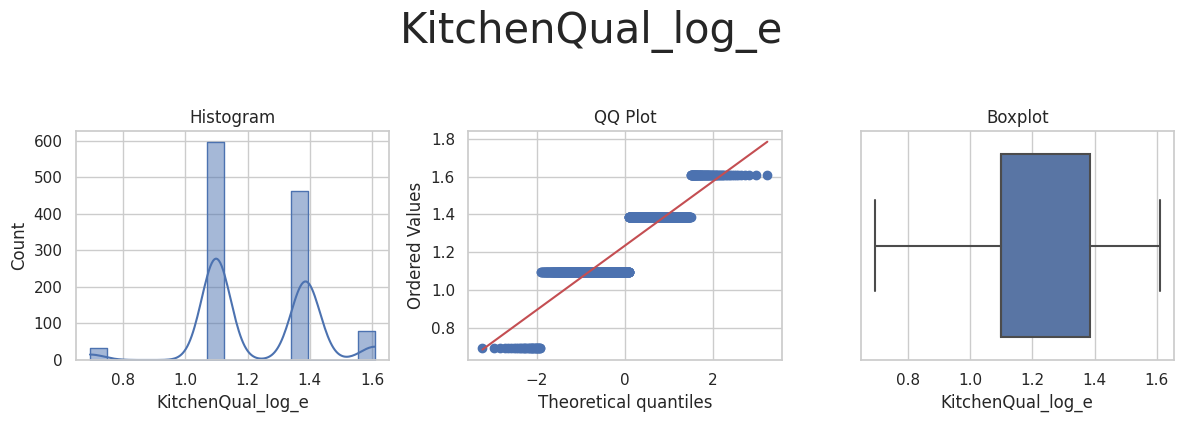

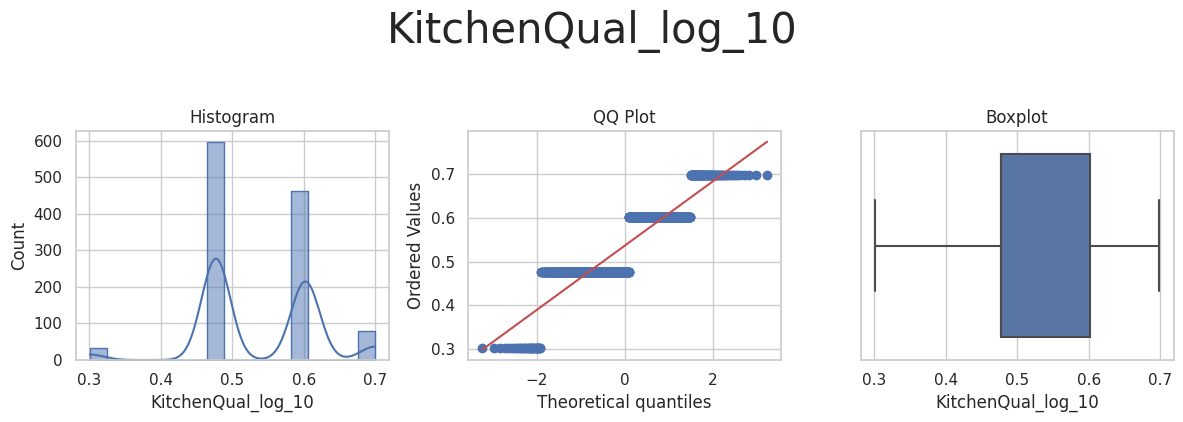

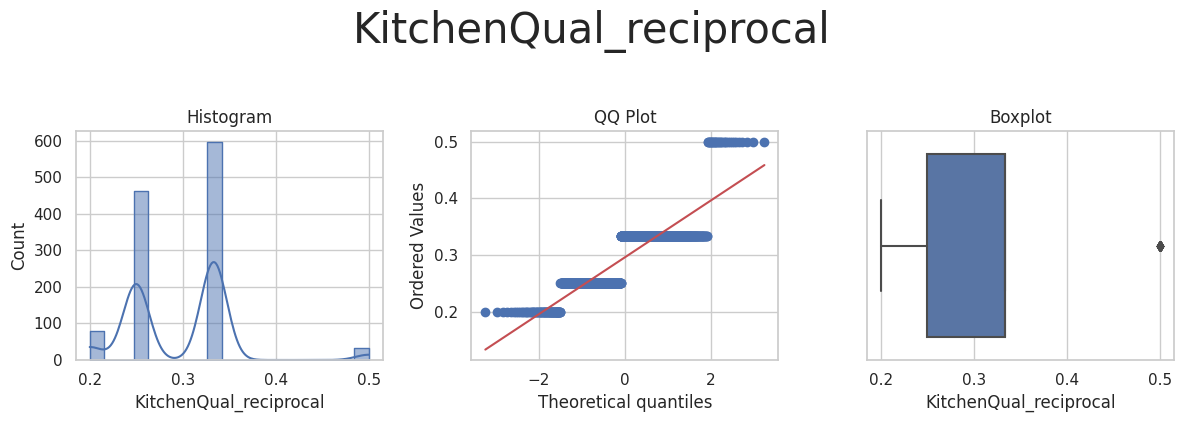

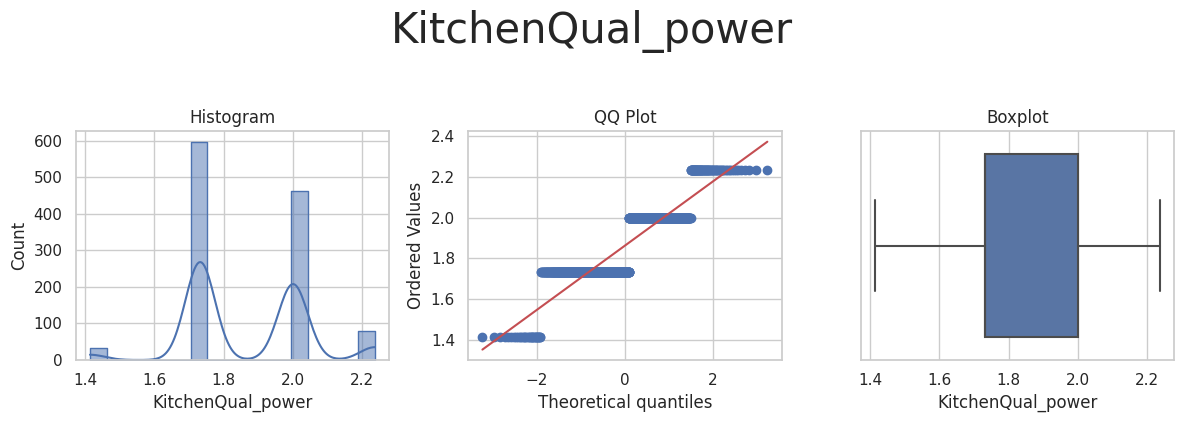

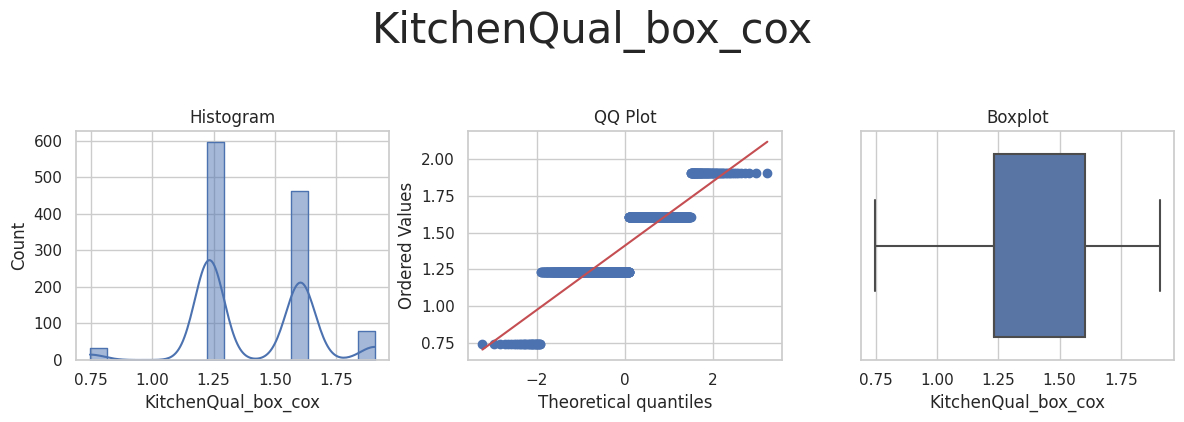

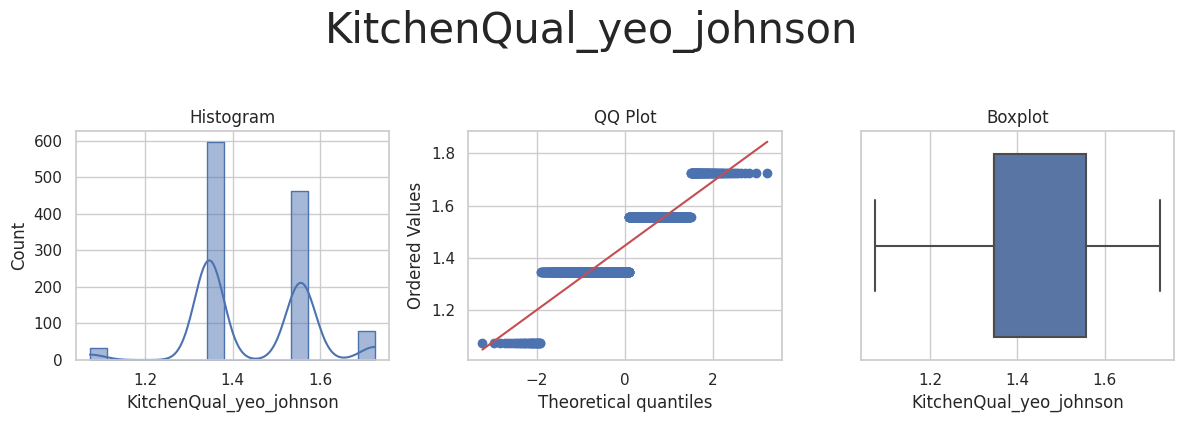



* Variable Analyzed: OverallQual
* Applied transformation: ['OverallQual_log_e', 'OverallQual_log_10', 'OverallQual_reciprocal', 'OverallQual_power', 'OverallQual_box_cox', 'OverallQual_yeo_johnson'] 



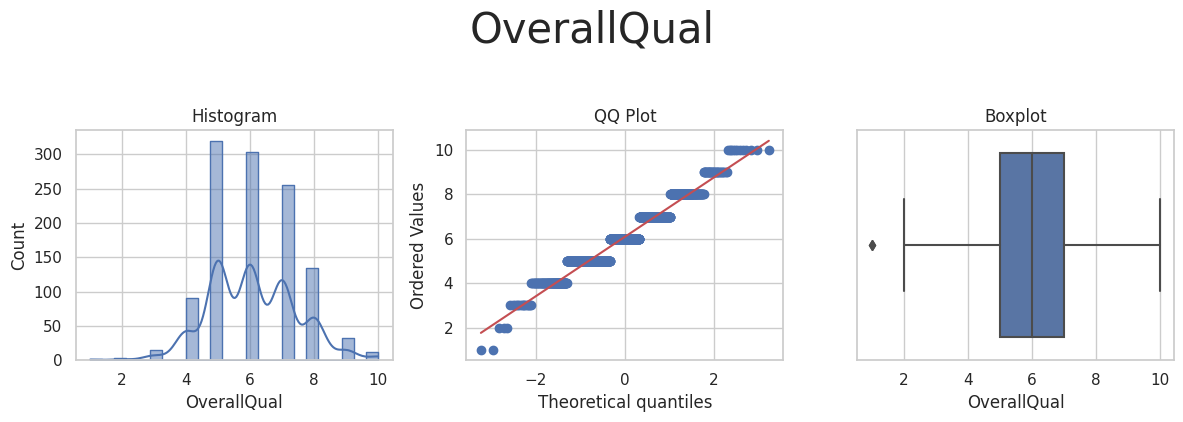

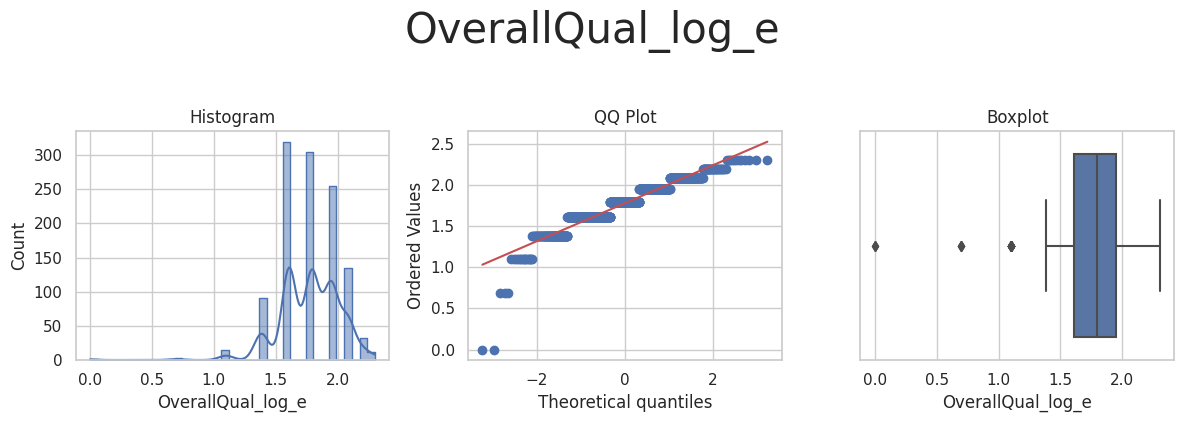

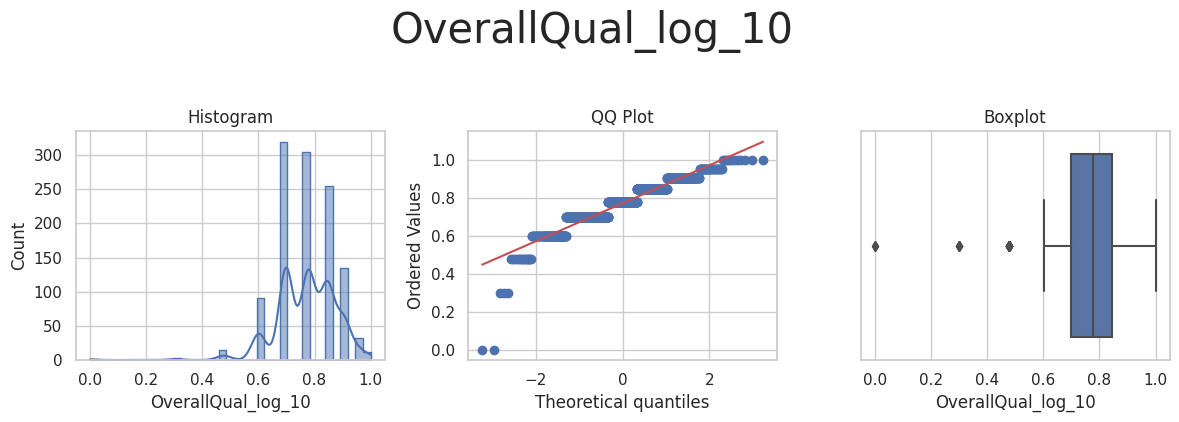

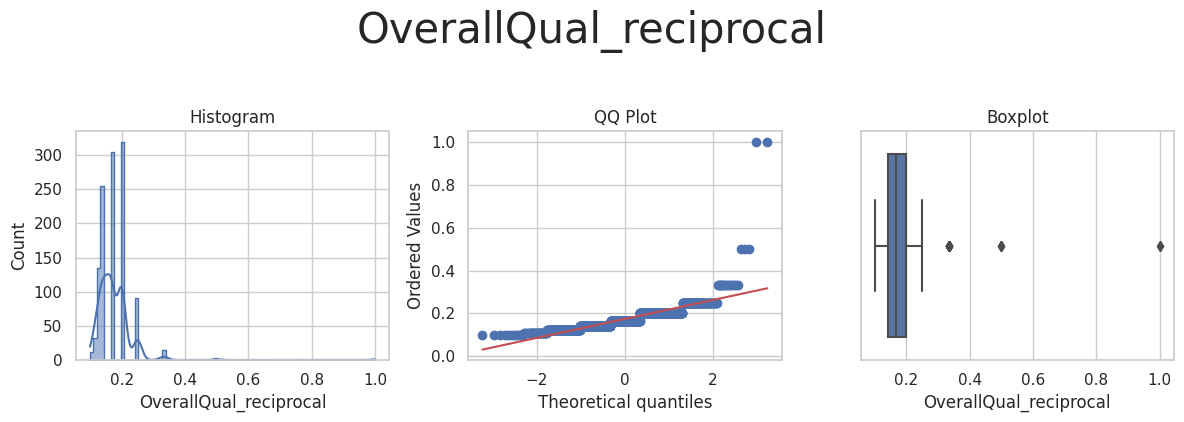

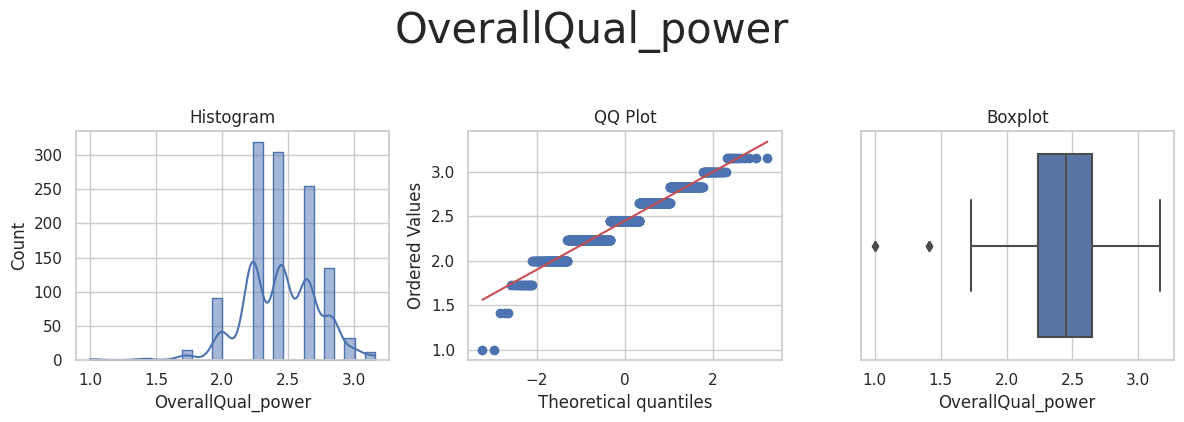

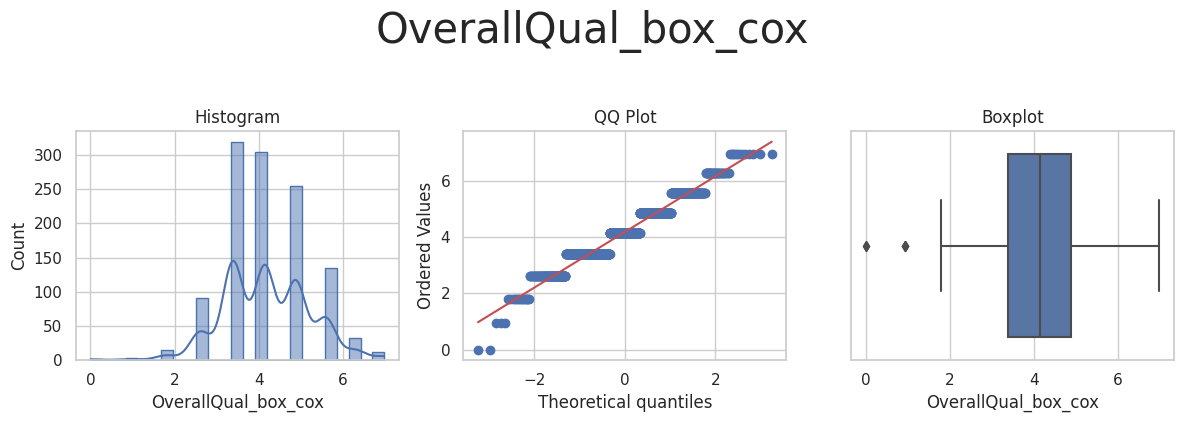

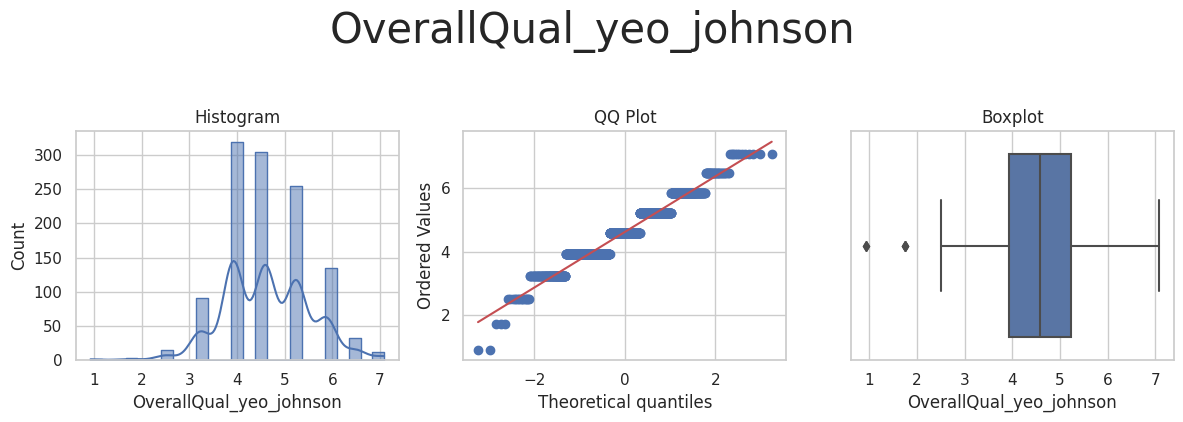

In [22]:
df_engineering = FeatureEngineeringAnalysis(df=df_engineering, analysis_type='numerical')

## Feature Analysis Review 

__1stFlrSF__
- Not normally distribted
- Best transformation fits are Box Cox, yeoman, log-e and log10 transformations

__GarageArea__
- Not normally distributed
- Power and Yeoman Johnson seem the best fit
- To review outliers

__GrLivArea__
- Not normally distributed
- Log-e has the best fit, with better normal distribution

__TotalBsmtSF__
- Not normally distributed, several outliers at top end of range.
- Power and Yeoman Johnson seem the best fit
- To review outliers

__TotalLivArea__
- Not normally distributed, slight negative skew.
- Power, yeoman and box cox all produce better normal distribution

__YearBuilt__
- Not normally distributed.
- Although box-cox and yeoman, provide a closer fit across the whole length og the QQ plot and no outlier the histogram remains unchancged. I would not add any transformation and discuss limitations to this feature.

__KitchenQual__
- Looks normally distributed.
- Other transformations do not improve distribution.

__OverallQual__
- Slight skew to the right.
- Other transformations do not improve distribution.


# Transformation Comparison

In [23]:
log_e_variables = ['1stFlrSF','GrLivArea']
power_variables = ['GarageArea','TotalBsmtSF','TotalLivArea']
log_10_variables = ['1stFlrSF']
yeoman_variables = ['1stFlrSF','TotalLivArea','GarageArea','TotalBsmtSF', 'YearBuilt']
box_cox_variables = ['1stFlrSF','TotalLivArea', 'YearBuilt']

We use two functions to print the effects of transformers used on the data. Code has been taken from CodeInstitute walkthrough project 2

In [24]:
def calculate_skew_kurtosis(df, col, moment):
    """ Print skew and kurtosis for each variable """
    print(f"{moment}  | skewness: {df[col].skew().round(2)} | kurtosis: "
          f"{df[col].kurtosis().round(2)}")


def compare_distributions_before_and_after_applying_transformer(df,df_transformed,method):
    """ Compare skew and kurtosis before and after applying transformer """
    for col in df.columns:
        print(f"*** {col} ***")
        print(f"*** {method} ***")
        calculate_skew_kurtosis(df, col, moment='before transformation')
        calculate_skew_kurtosis(
            df_transformed, col, moment='after transformation')
        print("\n")

### Log Transformation

In [25]:
df_log_transformers = df_engineering.loc[:, log_e_variables]
df_log_transformers.head(3)

1stFlrSF  GrLivArea
0      1828       1828
1       894        894
2       964        964

In [26]:
df_log10_transformers = df_engineering.loc[:, log_10_variables]
df_log10_transformers.head(3)

1stFlrSF
0      1828
1       894
2       964

#### Standard Log Transformation

In [27]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
      ('log', vt.LogTransformer(base='e'))
  ])

df_transformed = pipeline.fit_transform(df_log_transformers)

In [28]:
compare_distributions_before_and_after_applying_transformer(
    df_log_transformers, df_transformed, method='Log-e Transformer')

*** 1stFlrSF ***
*** Log-e Transformer ***
before transformation  | skewness: 0.96 | kurtosis: 1.69
after transformation  | skewness: -0.0 | kurtosis: 0.01


*** GrLivArea ***
*** Log-e Transformer ***
before transformation  | skewness: 1.08 | kurtosis: 2.54
after transformation  | skewness: -0.07 | kurtosis: 0.17




#### Base 10 Log Transformation

In [29]:
pipeline = Pipeline([
      ('log', vt.LogTransformer(base='10'))
  ])

df_transformed = pipeline.fit_transform(df_log10_transformers)

In [30]:
compare_distributions_before_and_after_applying_transformer(
    df_log10_transformers, df_transformed, method='Log-10 Transformer')

*** 1stFlrSF ***
*** Log-10 Transformer ***
before transformation  | skewness: 0.96 | kurtosis: 1.69
after transformation  | skewness: -0.0 | kurtosis: 0.01




### Power Transformation

In [31]:
df_power_transformers = df_engineering.loc[:, power_variables]
df_power_transformers.head(3)

GarageArea  TotalBsmtSF  TotalLivArea
0         774         1822          3650
1         308          894          1788
2         432          876          1840

In [32]:
pipeline = Pipeline([
      ('power', vt.PowerTransformer())
  ])

df_transformed = pipeline.fit_transform(df_power_transformers)
compare_distributions_before_and_after_applying_transformer(
  df_power_transformers, df_transformed, method='Power')

*** GarageArea ***
*** Power ***
before transformation  | skewness: 0.17 | kurtosis: 0.83
after transformation  | skewness: -1.61 | kurtosis: 4.01


*** TotalBsmtSF ***
*** Power ***
before transformation  | skewness: 0.59 | kurtosis: 2.17
after transformation  | skewness: -1.48 | kurtosis: 6.06


*** TotalLivArea ***
*** Power ***
before transformation  | skewness: 0.94 | kurtosis: 2.96
after transformation  | skewness: 0.24 | kurtosis: 1.1




### Box Cox Transformation

In [33]:
df_box_cox_transformers = df_engineering.loc[:, box_cox_variables]
df_box_cox_transformers.head(3)

1stFlrSF  TotalLivArea  YearBuilt
0      1828          3650       2007
1       894          1788       1962
2       964          1840       1921

In [34]:
pipeline = Pipeline([
      ('bct', vt.BoxCoxTransformer())
  ])

df_transformed = pipeline.fit_transform(df_box_cox_transformers)
compare_distributions_before_and_after_applying_transformer(
  df_box_cox_transformers, df_transformed, method='Box-Cox')

*** 1stFlrSF ***
*** Box-Cox ***
before transformation  | skewness: 0.96 | kurtosis: 1.69
after transformation  | skewness: 0.0 | kurtosis: 0.01


*** TotalLivArea ***
*** Box-Cox ***
before transformation  | skewness: 0.94 | kurtosis: 2.96
after transformation  | skewness: 0.04 | kurtosis: 1.05


*** YearBuilt ***
*** Box-Cox ***
before transformation  | skewness: -0.61 | kurtosis: -0.43
after transformation  | skewness: -0.13 | kurtosis: -1.19




### Yeo-Johnson Transformation

In [35]:
df_yeoman_transformers = df_engineering.loc[:, yeoman_variables]
df_yeoman_transformers.head(3)

1stFlrSF  TotalLivArea  GarageArea  TotalBsmtSF  YearBuilt
0      1828          3650         774         1822       2007
1       894          1788         308          894       1962
2       964          1840         432          876       1921

In [36]:
pipeline = Pipeline([
      ('yj', vt.YeoJohnsonTransformer())
  ])

df_transformed = pipeline.fit_transform(df_yeoman_transformers)
compare_distributions_before_and_after_applying_transformer(
  df_yeoman_transformers, df_transformed, method='Yeo_Johnson')

*** 1stFlrSF ***
*** Yeo_Johnson ***
before transformation  | skewness: 0.96 | kurtosis: 1.69
after transformation  | skewness: 0.0 | kurtosis: 0.01


*** TotalLivArea ***
*** Yeo_Johnson ***
before transformation  | skewness: 0.94 | kurtosis: 2.96
after transformation  | skewness: 0.04 | kurtosis: 1.05


*** GarageArea ***
*** Yeo_Johnson ***
before transformation  | skewness: 0.17 | kurtosis: 0.83
after transformation  | skewness: -0.29 | kurtosis: 1.01


*** TotalBsmtSF ***
*** Yeo_Johnson ***
before transformation  | skewness: 0.59 | kurtosis: 2.17
after transformation  | skewness: 0.01 | kurtosis: 2.06


*** YearBuilt ***
*** Yeo_Johnson ***
before transformation  | skewness: -0.61 | kurtosis: -0.43
after transformation  | skewness: -0.13 | kurtosis: -1.19




### Transformation Review 

__1stFlrSF__
- Yeo Johnson, Box Cox and Log transformations provide almost identical improvements.
- Yeo Johnson transformation to be applied to reduce number of transformation pipelines

__GarageArea__
- Yeo Johnson and Power transformations did not improve the skewness
- No transformations applied

__GrLivArea__
- Log-e transformation improved data therefore to be applied

__TotalBsmtSF__
- Yeo Johnson improved data therefore to be applied

__TotalLivArea__
- Yeo Johnson and Box Cox provided identical improvements
- Yeo Johnson transformation to be applied to reduce number of transformation pipelines

__YearBuilt__
- Both Yeo Johnson and Box Cox imporved skewness (-0.61 to -0.13) but worsened kurtosis (-0.43 to -1.19)
- Despitie this, the improvement in skewness is < 0.5
- Yeo Johnson transformation to be applied to reduce number of transformation pipelines

__KitchenQual__
- No transformations to be applied

__OverallQual__
- No transformations to be applied


### Proposed Pipeline

In [37]:
log_variables = ['GrLivArea']
yj_variables = ['1stFlrSF','TotalBsmtSF','YearBuilt','TotalLivArea']

pipeline = Pipeline([
    ('log', vt.LogTransformer(variables=log_variables,base='e')),
    ('yj', vt.YeoJohnsonTransformer(variables=yj_variables))
  ])

TrainSet = pipeline.fit_transform(TrainSet)
TestSet = pipeline.fit_transform(TestSet)

### Outliers

We will use the Windsorizer function to handle outliers and further engineer the data. All variables except 'KitchenQual' and 'YearBuilt' were identified during analysis as having outliers

In [38]:
outlier_variables = ['1stFlrSF','TotalBsmtSF','TotalLivArea','OverallQual','GarageArea','GrLivArea']

In [39]:
df_outliers = TrainSet[outlier_variables].copy()
df_outliers.head(5)


1stFlrSF  TotalBsmtSF  TotalLivArea  OverallQual  GarageArea  GrLivArea
0  7.585316   495.850351     48.349727            9         774   7.510978
1  6.857203   280.785318     36.963106            5         308   6.795706
2  6.933857   276.257124     37.367369            5         432   6.871091
3  7.504725   439.843394     46.334277            8         857   7.431892
4  7.411301   433.785653     45.385986            7         843   7.340187

* Variable Analyzed: 1stFlrSF
* Applied transformation: ['1stFlrSF_iqr'] 



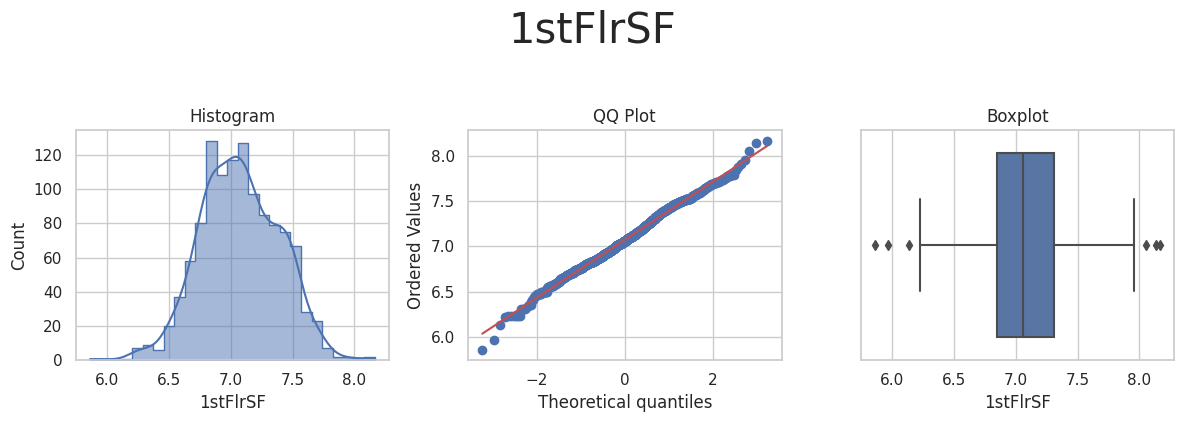

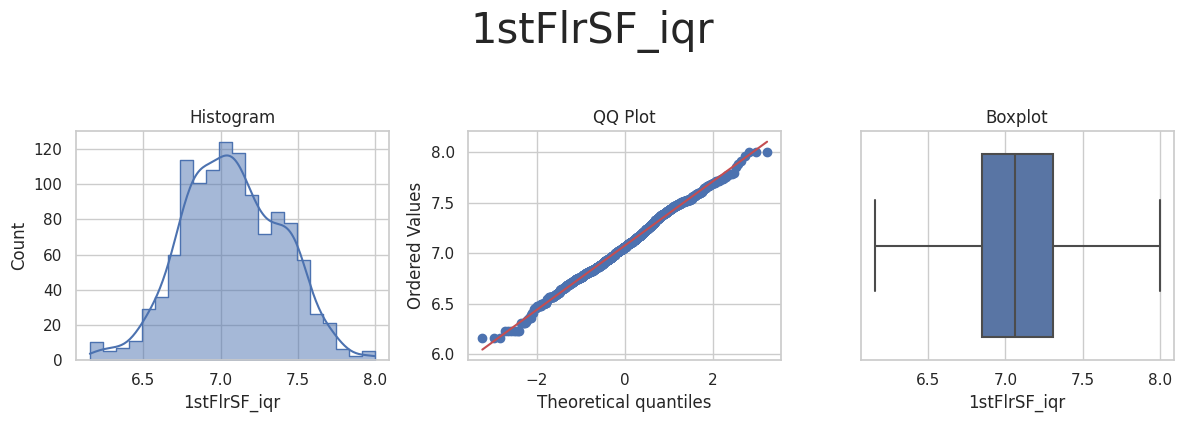



* Variable Analyzed: TotalBsmtSF
* Applied transformation: ['TotalBsmtSF_iqr'] 



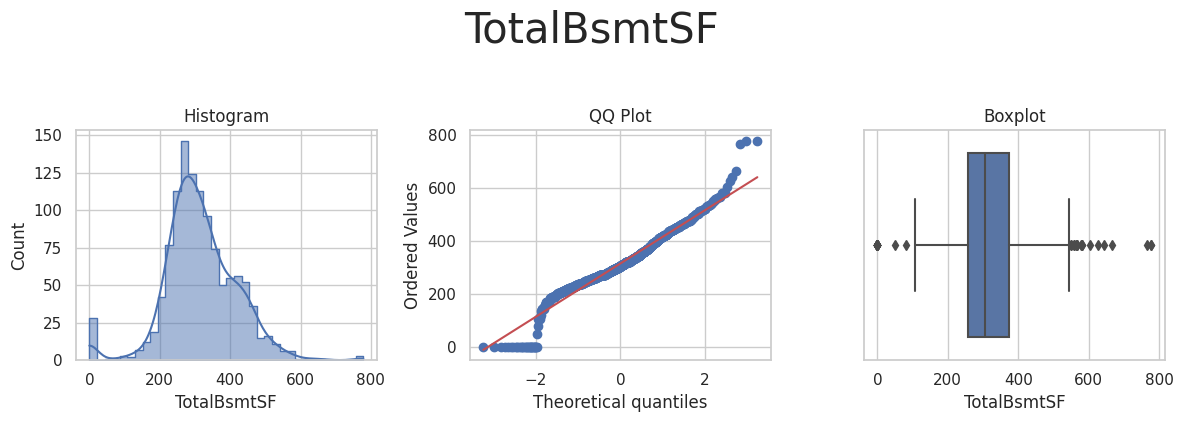

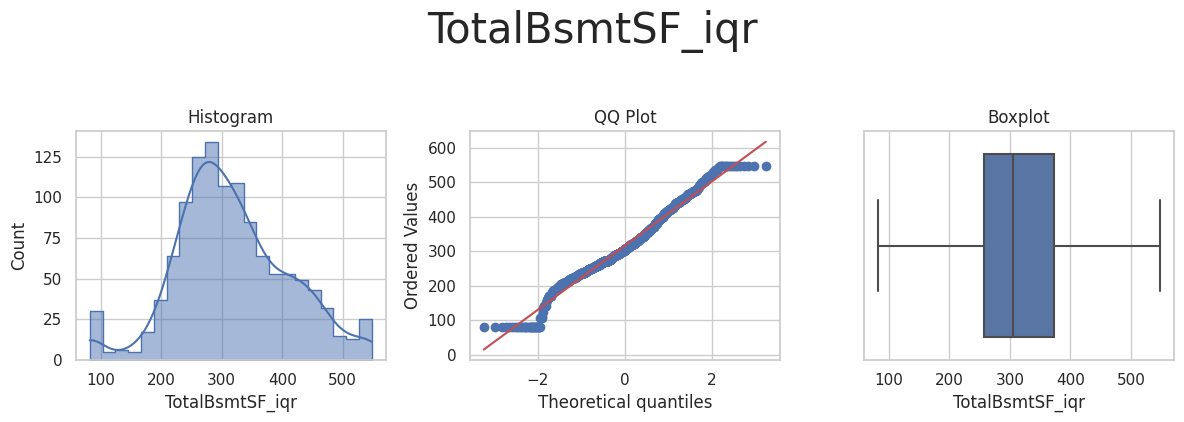



* Variable Analyzed: TotalLivArea
* Applied transformation: ['TotalLivArea_iqr'] 



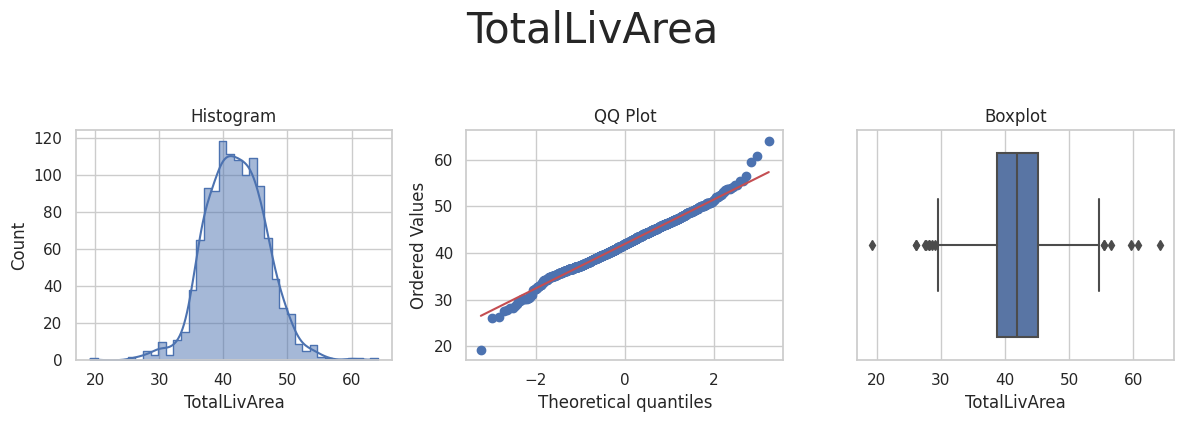

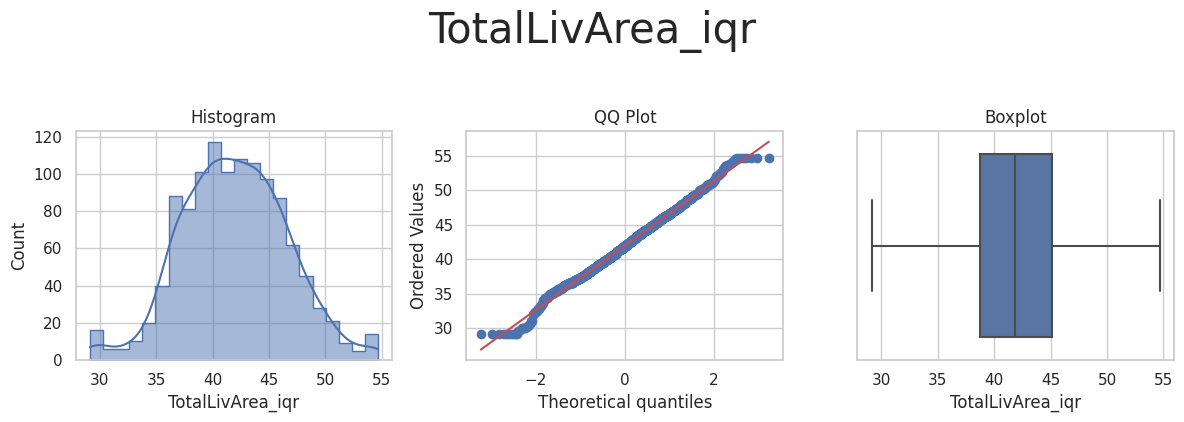



* Variable Analyzed: OverallQual
* Applied transformation: ['OverallQual_iqr'] 



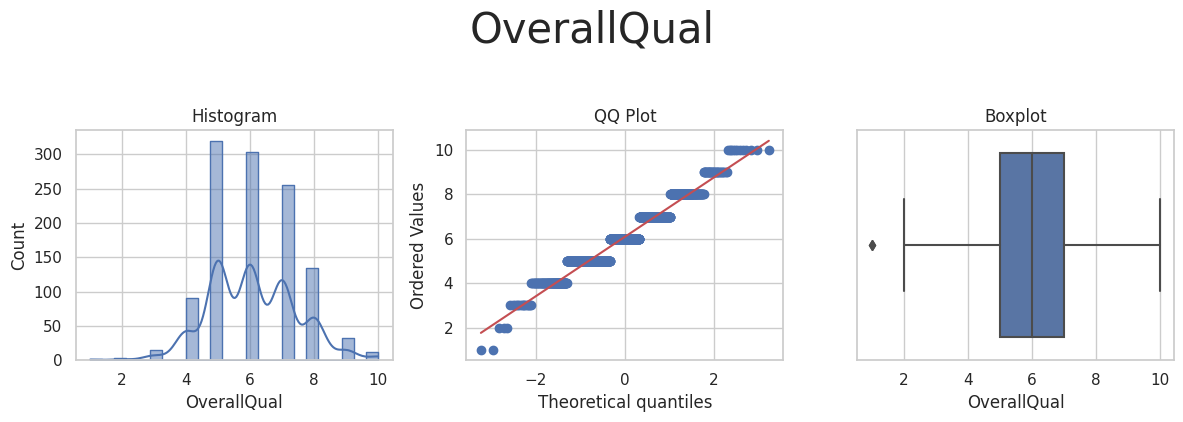

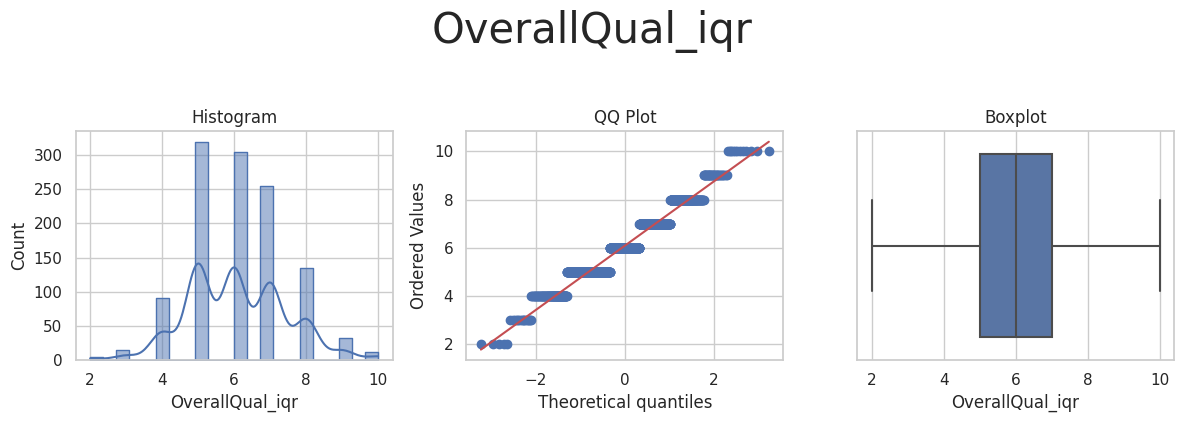



* Variable Analyzed: GarageArea
* Applied transformation: ['GarageArea_iqr'] 



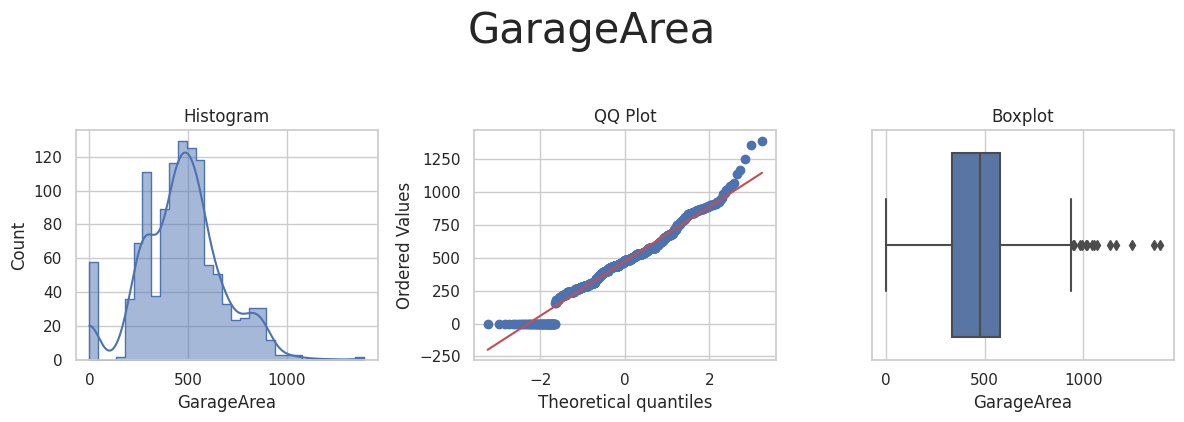

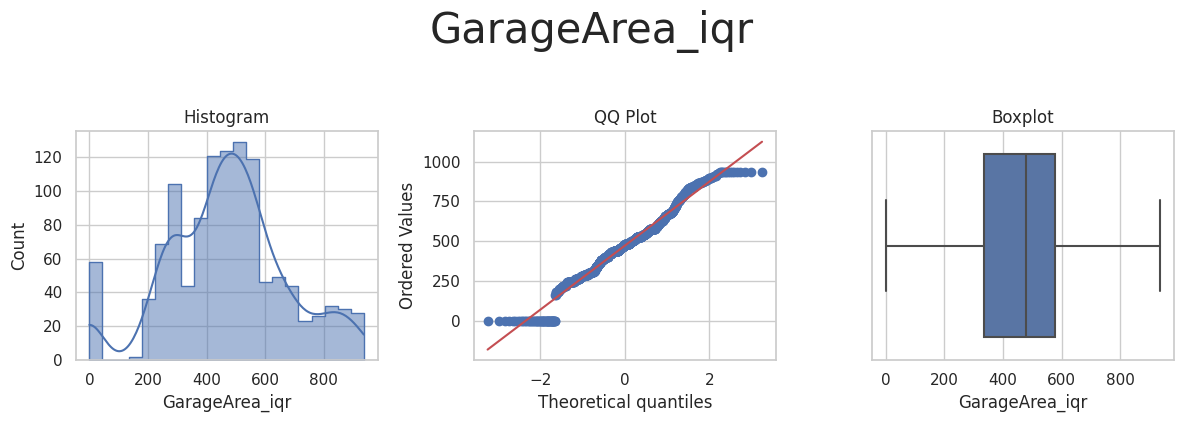



* Variable Analyzed: GrLivArea
* Applied transformation: ['GrLivArea_iqr'] 



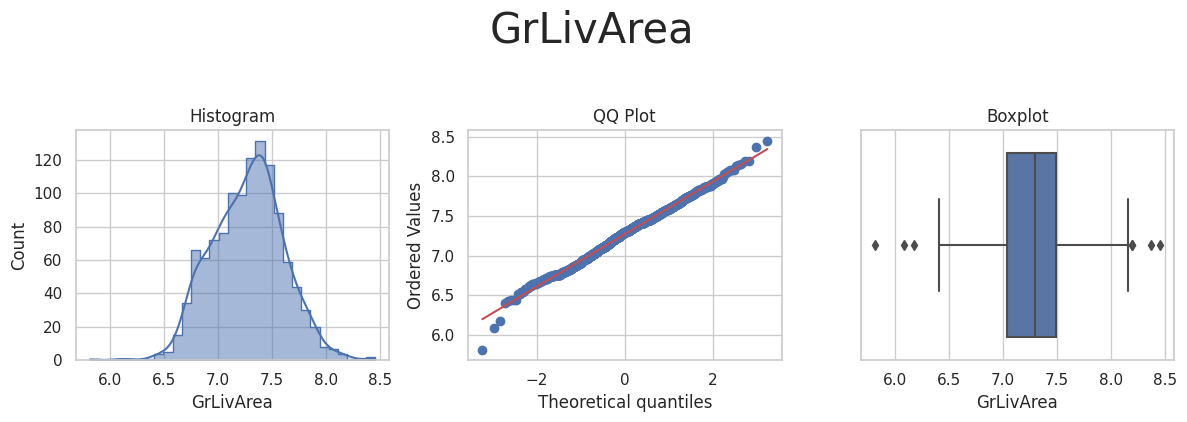

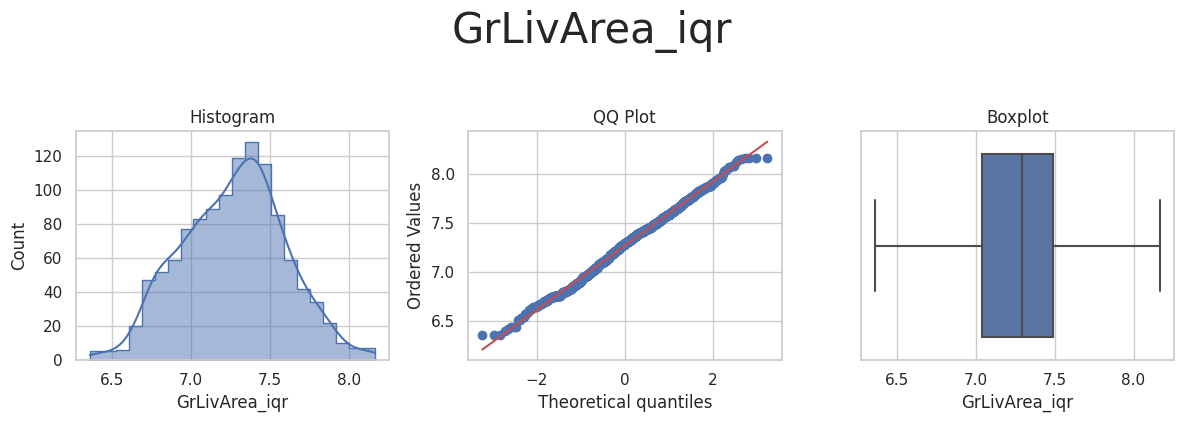

In [40]:
df_engineering_outlier = FeatureEngineeringAnalysis(df=df_outliers, analysis_type='outlier_winsorizer')

### SmartCorrelatedSelection Variables

All variables were applied to the SmartCorrelatedSelecton function (code taken from CodeInstitute walkthrough project 2)

Initially the threshold for correlation was set at 0.6, however this would remove half of the selected variables identified earlier. The threshold was set to 0.8 which requires a much stronger correlation and only two variables were suggested to be dropped.

- '1stFlrSF'
- 'OverallQual'

In [41]:
df_engineering = TrainSet.copy().drop(['SalePrice'], axis=1)
df_engineering.head(3)

1stFlrSF  2ndFlrSF  BedroomAbvGr  BsmtExposure  BsmtFinSF1  BsmtFinType1  \
0  7.585316         0             3             3          48             1   
1  6.857203         0             2             1           0             1   
2  6.933857         0             2             1         713             5   

   BsmtUnfSF  GarageArea  GarageFinish  GarageYrBlt  ...  LotArea  \
0       1774         774             1         2007  ...    11694   
1        894         308             1         1962  ...     6600   
2        163         432             1         1921  ...    13360   

   LotFrontage  MasVnrArea  OpenPorchSF  OverallCond  OverallQual  \
0           90         452          108            5            9   
1           60           0            0            5            5   
2           80           0            0            7            5   

   TotalBsmtSF     YearBuilt  YearRemodAdd  TotalLivArea  
0   495.850351  6.844123e+70          2007     48.349727  
1   280.785318  4.170722e+70          1962     36.963106  
2   276.257124  2.629589e+70          2006     37.367369  

[3 rows x 22 columns]

In [42]:
from feature_engine.selection import SmartCorrelatedSelection
corr_sel = SmartCorrelatedSelection(variables=None, method="spearman", threshold=0.8, selection_method="variance")

corr_sel.fit_transform(df_engineering)
corr_sel.correlated_feature_sets_

[{'1stFlrSF', 'TotalBsmtSF'},
 {'GarageYrBlt', 'YearBuilt'},
 {'GrLivArea', 'TotalLivArea'}]

In [43]:
corr_sel.features_to_drop_

['1stFlrSF', 'GarageYrBlt', 'GrLivArea']

---

# Conclusion

Following the above feature engineering. The following recommendations are proposed.

- Focused variables
     - ['1stFlrSF','GarageArea','GrLivArea','TotalBsmtSF','TotalLivArea','YearBuilt','KitchenQual','OverallQual']
- Numerical Transformaton
     - Log-e = ['GrLivArea']
     - Yeo Johnson = ['1stFlrSF','TotalBsmtSF','YearBuilt','TotalLivArea']
- Outlier Transformation
     - Windorizer = ['1stFlrSF','TotalBsmtSF','TotalLivArea','OverallQual','GarageArea','GrLivArea']
- Smart Correlated Selection
     - Variables to be removed = ['1stFlrSF','GarageYrBlt','GrLivArea']